## Preprocessing the dataset to make it ready to use

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('Data/AirQualityUCI.csv', delimiter=';', decimal=',')
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [49]:
#drop the unnamed 15 and 16 col which are empty
df.dropna(axis=1, how='all', inplace=True)

In [50]:
#creation of the datetime column

df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')
df['Date_Time'].head()

# drop rows where Date_Time is missing
df.dropna(subset=['Date_Time'], inplace=True)
df.reset_index(drop=True, inplace=True)

# dropping the original date time cols not useful anymore
df.drop(["Date", "Time"], inplace=True, axis=1)

In [51]:
# creating a hour col 
df['Hour'] = df['Date_Time'].dt.hour
df['Day'] = df['Date_Time'].dt.day

df['weekday'] = df['Date_Time'].dt.weekday

df.head(50)

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0      2.6       1360.0     150.0      11.9         1046.0    166.0   
1      2.0       1292.0     112.0       9.4          955.0    103.0   
2      2.2       1402.0      88.0       9.0          939.0    131.0   
3      2.2       1376.0      80.0       9.2          948.0    172.0   
4      1.6       1272.0      51.0       6.5          836.0    131.0   
5      1.2       1197.0      38.0       4.7          750.0     89.0   
6      1.2       1185.0      31.0       3.6          690.0     62.0   
7      1.0       1136.0      31.0       3.3          672.0     62.0   
8      0.9       1094.0      24.0       2.3          609.0     45.0   
9      0.6       1010.0      19.0       1.7          561.0   -200.0   
10  -200.0       1011.0      14.0       1.3          527.0     21.0   
11     0.7       1066.0       8.0       1.1          512.0     16.0   
12     0.7       1052.0      16.0       1.6          553.0     34.0   
13     1.1       1144.0      29.0       3.2          667.0     98.0   
14     2.0       1333.0      64.0       8.0          900.0    174.0   
15     2.2       1351.0      87.0       9.5          960.0    129.0   
16     1.7       1233.0      77.0       6.3          827.0    112.0   
17     1.5       1179.0      43.0       5.0          762.0     95.0   
18     1.6       1236.0      61.0       5.2          774.0    104.0   
19     1.9       1286.0      63.0       7.3          869.0    146.0   
20     2.9       1371.0     164.0      11.5         1034.0    207.0   
21     2.2       1310.0      79.0       8.8          933.0    184.0   
22     2.2       1292.0      95.0       8.3          912.0    193.0   
23     2.9       1383.0     150.0      11.2         1020.0    243.0   
24     4.8       1581.0     307.0      20.8         1319.0    281.0   
25     6.9       1776.0     461.0      27.4         1488.0    383.0   
26     6.1       1640.0     401.0      24.0         1404.0    351.0   
27     3.9       1313.0     197.0      12.8         1076.0    240.0   
28     1.5        965.0      61.0       4.7          749.0     94.0   
29     1.0        913.0      26.0       2.6          629.0     47.0   
30     1.7       1080.0      55.0       5.9          805.0    122.0   
31     1.9       1044.0      53.0       6.4          829.0    133.0   
32     1.4        988.0      40.0       4.1          718.0     82.0   
33     0.8        889.0      21.0       1.9          574.0   -200.0   
34  -200.0        831.0      10.0       1.1          506.0     21.0   
35     0.6        847.0       7.0       1.0          501.0     30.0   
36     0.8        927.0      17.0       1.8          571.0     56.0   
37     1.4       1091.0      33.0       4.4          730.0    109.0   
38     4.4       1587.0     202.0      17.9         1236.0    307.0   
39  -200.0       1545.0    -200.0      22.1         1353.0   -200.0   
40     3.1       1350.0     208.0      14.0         1118.0    187.0   
41     2.7       1263.0     166.0      11.6         1037.0    216.0   
42     2.1       1206.0     114.0      10.2          986.0    143.0   
43     2.5       1252.0     140.0      11.0         1016.0    160.0   
44     2.7       1287.0     169.0      12.8         1078.0    163.0   
45     2.9       1353.0     185.0      14.2         1122.0    190.0   
46     2.8       1309.0     165.0      12.7         1073.0    178.0   
47     2.4       1274.0     133.0      11.7         1041.0    150.0   
48     3.9       1510.0     233.0      19.3         1277.0    206.0   
49     3.7       1525.0     242.0      18.2         1246.0    202.0   

    PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0         1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
1         1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
2         1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
3         1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   
4 

In [52]:
#replacing -200 w nan
df.replace(-200, np.nan, inplace=True)

In [53]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   
std       1.453252   217.080037   204.459921     7.449820     266.831429   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
min       2.000000    322.000000     2.000000    551.000000   221.000000   
25%      98.000000    658.000000    78.000000   1227.000000   731.500000   
50%     180.000000    806.000000   109.000000   1463.000000   963.000000   
75%     326.000000    969.500000   142.000000   1674.000000  1273.500000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   
std     212.979168    256.817320    48.370108    346.206794   398.484288   

                 T           RH           AH            Date_Time  \
count  8991.000000  8991.000000  8991.000000                 9357   
mean     18.317829    49.234201     1.025530  2004-09-21 16:00:00   
min      -1.900000     9.200000     0.184700  2004-03-10 18:00:00   
25%      11.800000    35.800000     0.736800  2004-06-16 05:00:00   
50%      17.800000    49.600000     0.995400  2004-09-21 16:00:00   
75%      24.400000    62.500000     1.313700  2004-12-28 03:00:00   
max      44.600000    88.700000     2.231000  2005-04-04 14:00:00   
std       8.832116    17.316892     0.403813                  NaN   

              Hour          Day      weekday  
count  9357.000000  9357.000000  9357.000000  
mean     11.498557    15.876884     3.009939  
min       0.000000     1.000000     0.000000  
25%       5.000000     8.000000     1.000000  
50%      11.000000    16.000000     3.000000  
75%      18.000000    23.000000     5.000000  
max      23.000000    31.000000     6.000000  
std       6.923182     8.808653     2.000323

In [54]:
# NMHC has too many nan values so we drop the entire col
df.drop(['NMHC(GT)'], axis=1, inplace=True)
df.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  7674.000000  8991.000000  8991.000000    8991.000000  7718.000000   
mean      2.152750  1099.833166    10.083105     939.153376   246.896735   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.100000   937.000000     4.400000     734.500000    98.000000   
50%       1.800000  1063.000000     8.200000     909.000000   180.000000   
75%       2.900000  1231.000000    14.000000    1116.000000   326.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   
std       1.453252   217.080037     7.449820     266.831429   212.979168   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   8991.000000  7715.000000   8991.000000  8991.000000  8991.000000   
mean     835.493605   113.091251   1456.264598  1022.906128    18.317829   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      658.000000    78.000000   1227.000000   731.500000    11.800000   
50%      806.000000   109.000000   1463.000000   963.000000    17.800000   
75%      969.500000   142.000000   1674.000000  1273.500000    24.400000   
max     2683.000000   340.000000   2775.000000  2523.000000    44.600000   
std      256.817320    48.370108    346.206794   398.484288     8.832116   

                RH           AH            Date_Time         Hour  \
count  8991.000000  8991.000000                 9357  9357.000000   
mean     49.234201     1.025530  2004-09-21 16:00:00    11.498557   
min       9.200000     0.184700  2004-03-10 18:00:00     0.000000   
25%      35.800000     0.736800  2004-06-16 05:00:00     5.000000   
50%      49.600000     0.995400  2004-09-21 16:00:00    11.000000   
75%      62.500000     1.313700  2004-12-28 03:00:00    18.000000   
max      88.700000     2.231000  2005-04-04 14:00:00    23.000000   
std      17.316892     0.403813                  NaN     6.923182   

               Day      weekday  
count  9357.000000  9357.000000  
mean     15.876884     3.009939  
min       1.000000     0.000000  
25%       8.000000     1.000000  
50%      16.000000     3.000000  
75%      23.000000     5.000000  
max      31.000000     6.000000  
std       8.808653     2.000323

In [56]:
print("Null values before ", df.isnull().sum() )

df.interpolate(method="linear", inplace=True)

print("Null values after ", df.isnull().sum() )


Null values before  CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Date_Time           0
Hour                0
Day                 0
weekday             0
dtype: int64
Null values after  CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Date_Time        0
Hour             0
Day              0
weekday          0
dtype: int64


### Having successfully removed all null values and removed rows with no timestamp we move to some more visualisatoin

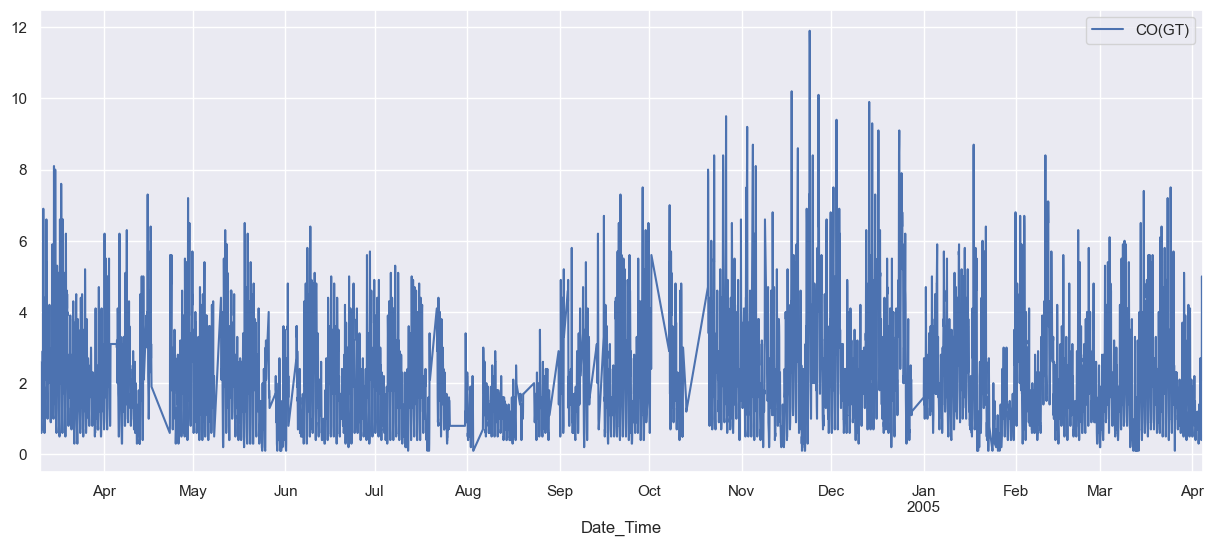

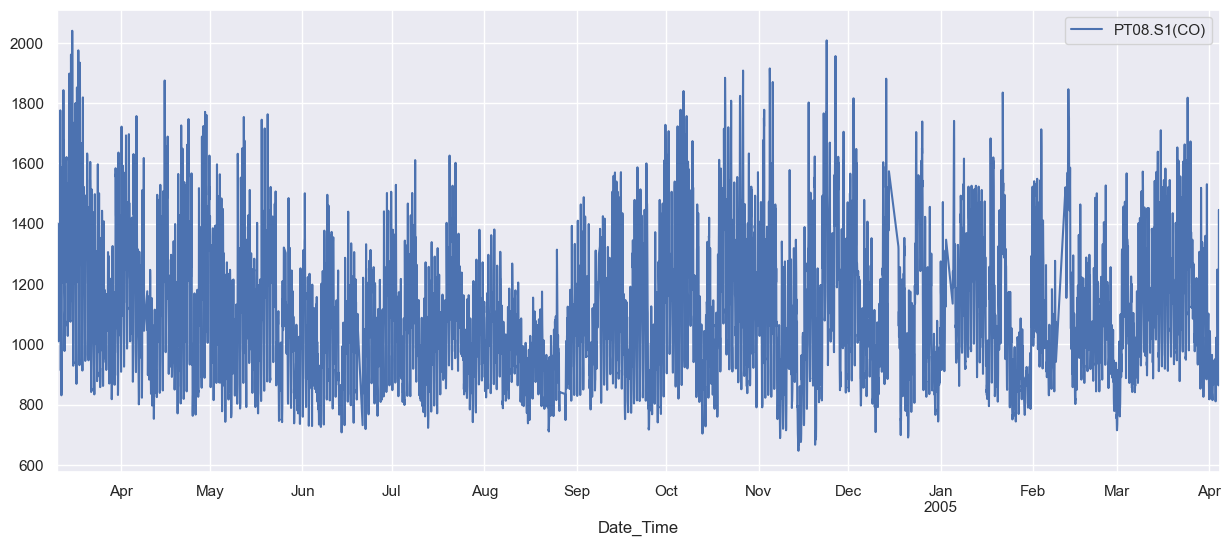

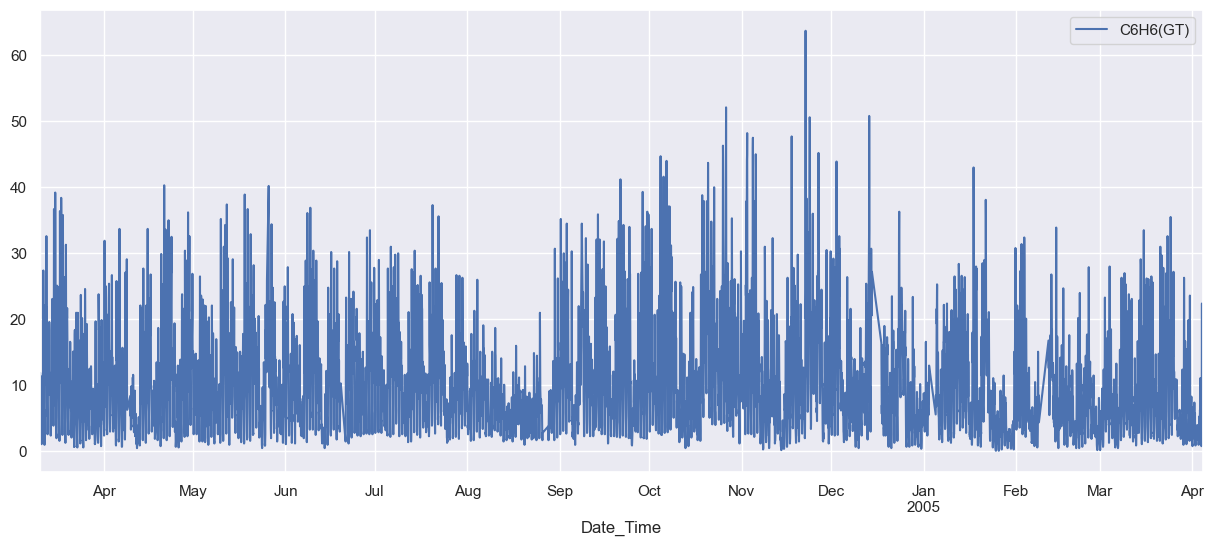

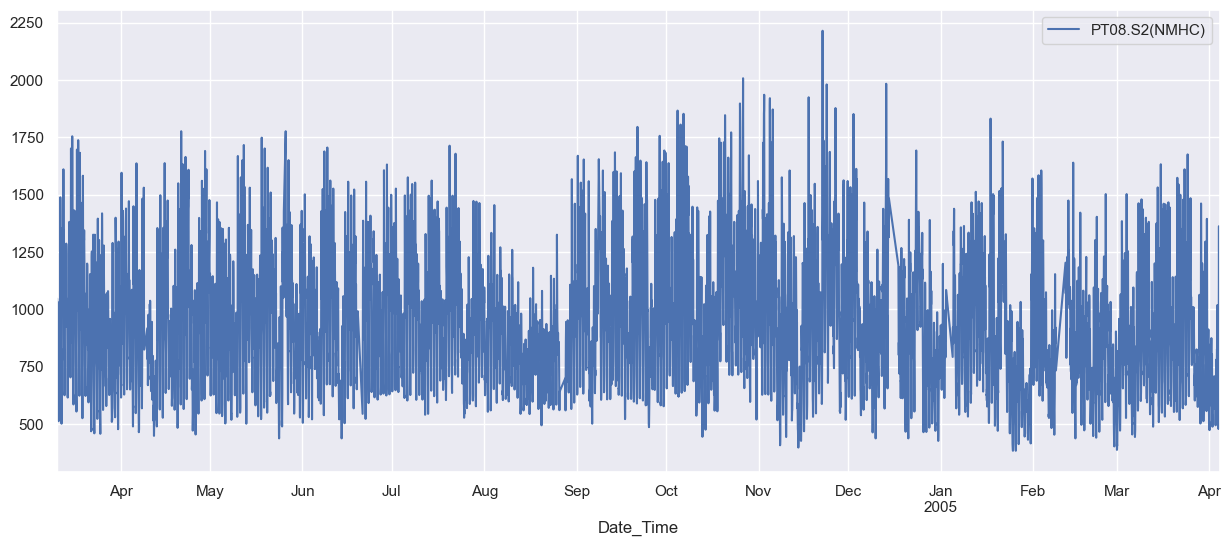

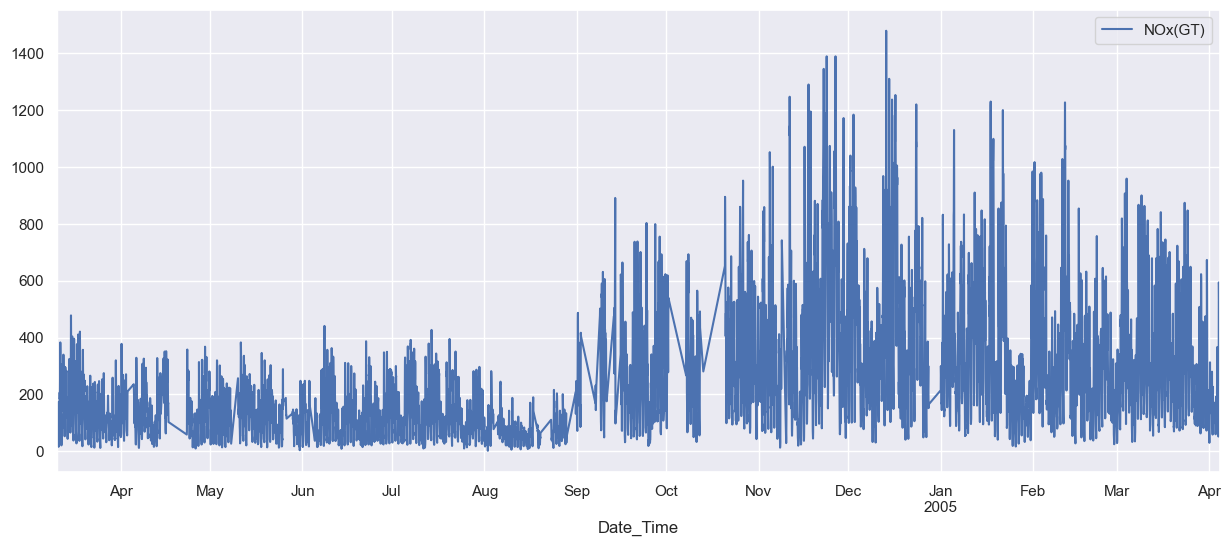

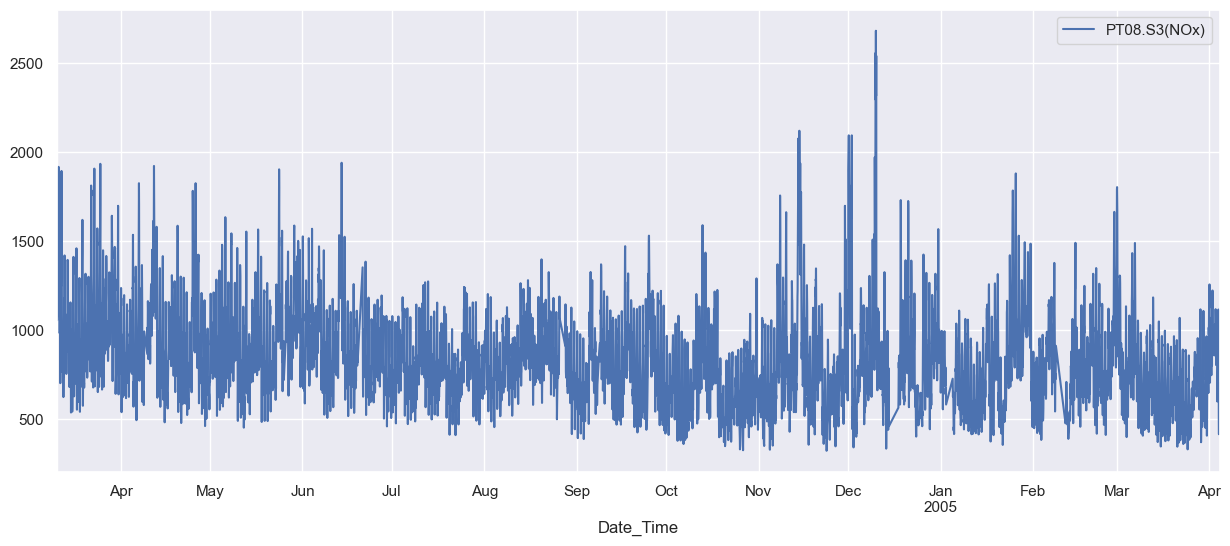

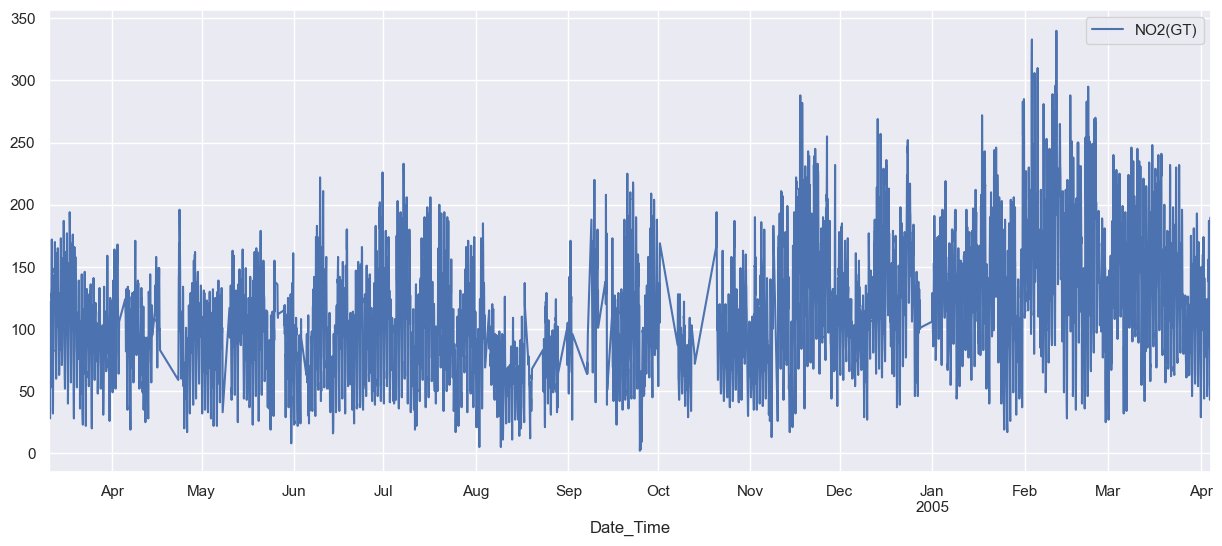

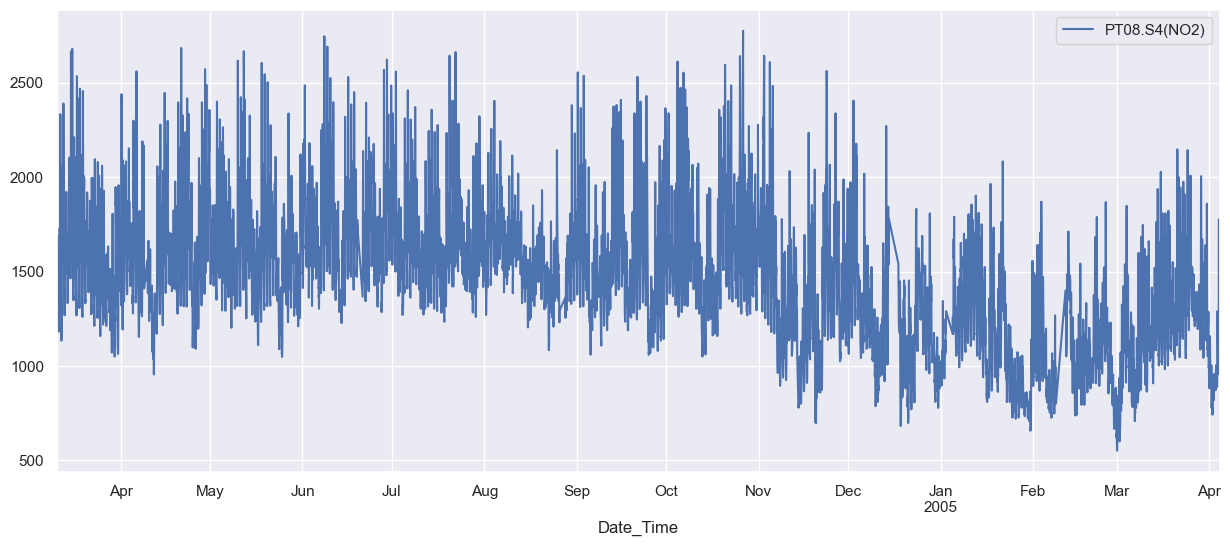

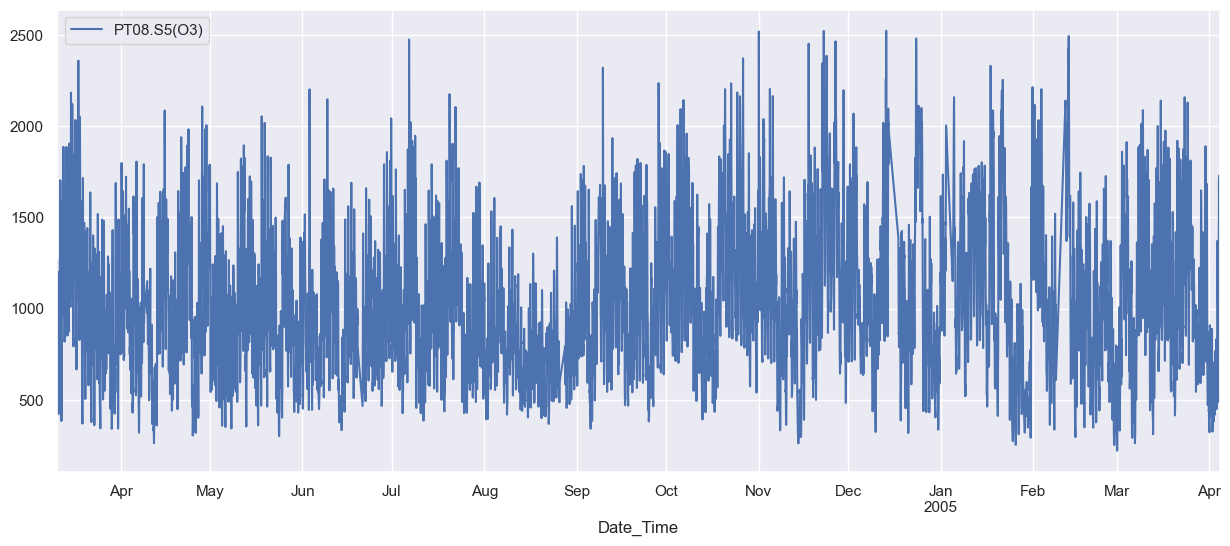

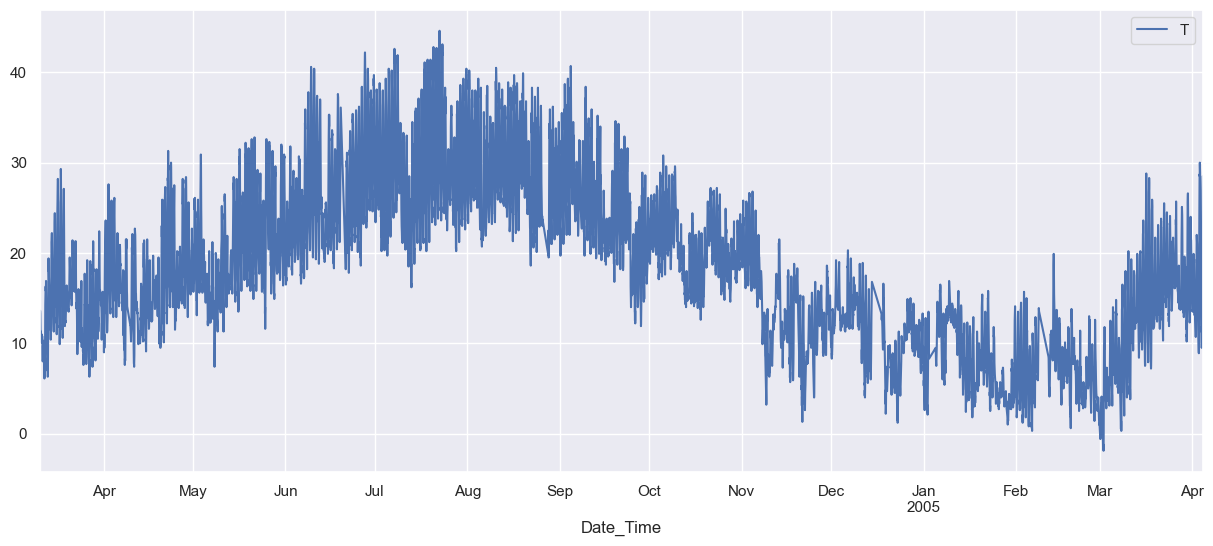

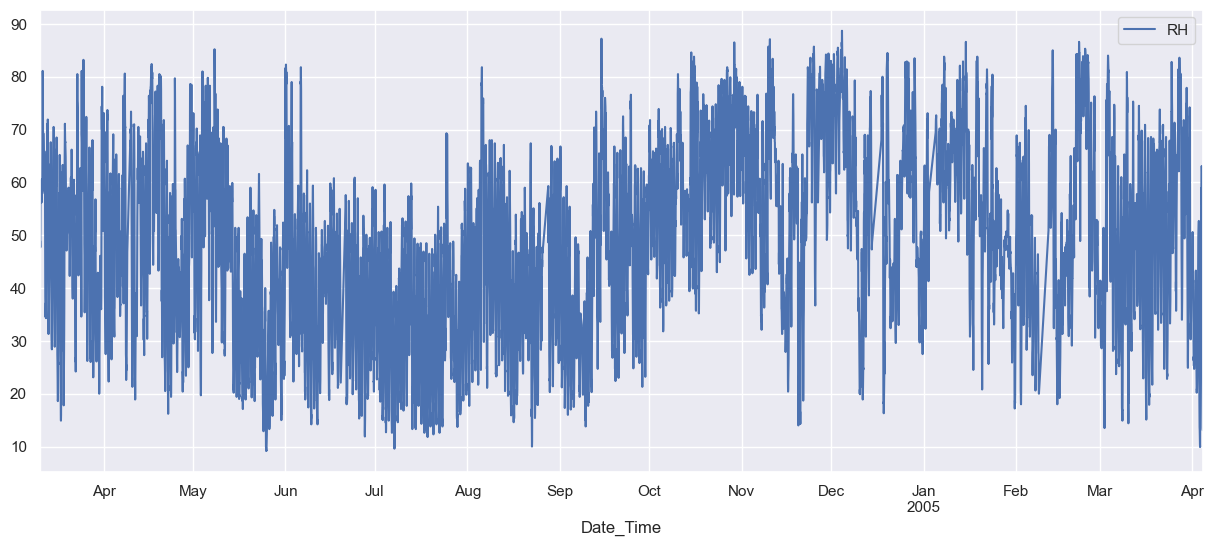

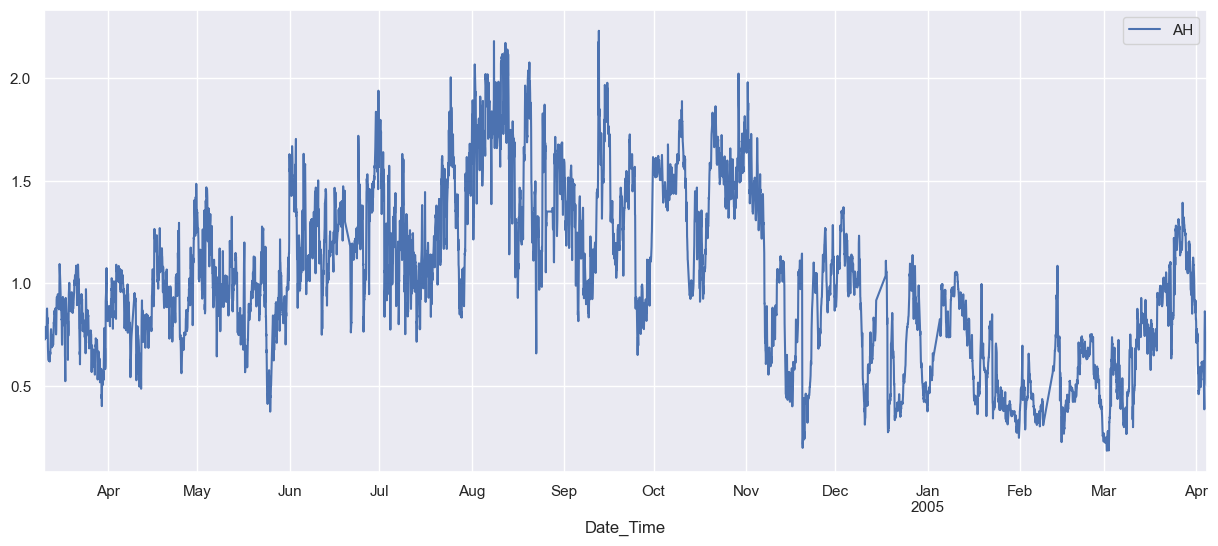

In [73]:
sns.set_theme({'figure.figsize':(15, 6)})

for feature in df:
    if feature != 'Date_Time' and feature != 'Hour' and feature != 'Day' and feature != 'weekday':
        df.plot(x='Date_Time', y=feature)
        plt.show()

## Looking at plots by week and day of week now

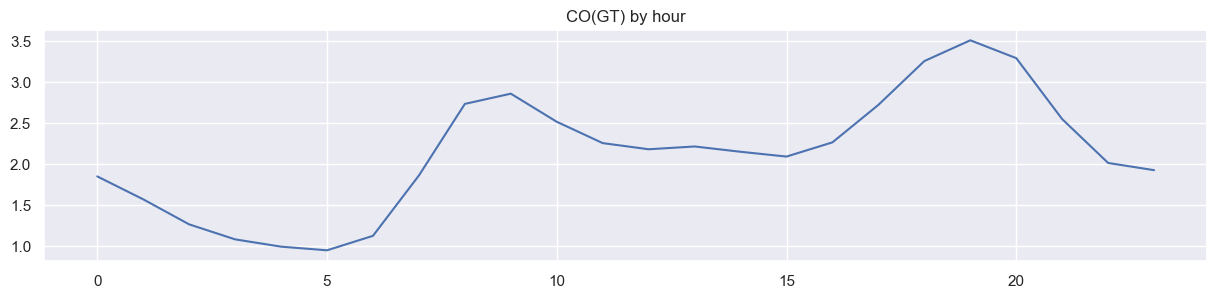

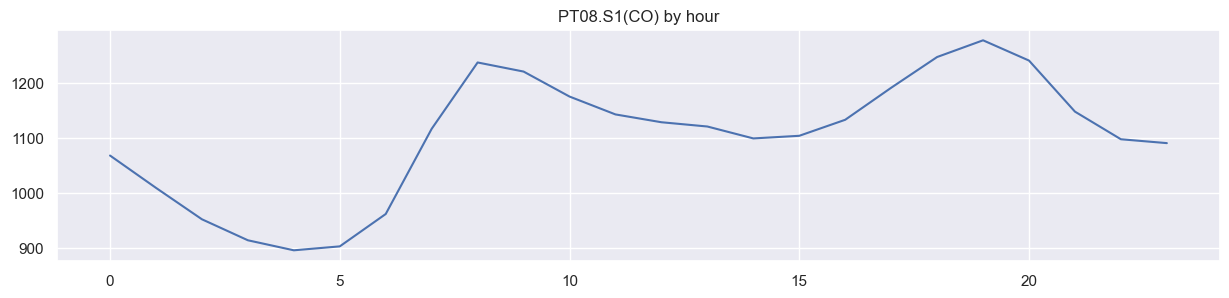

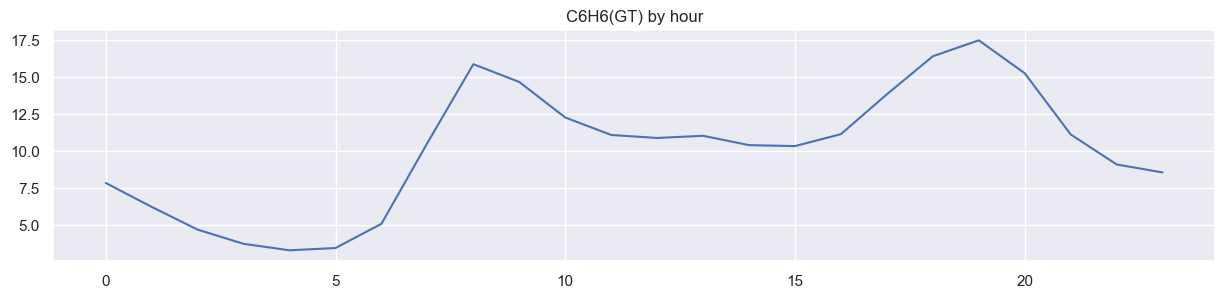

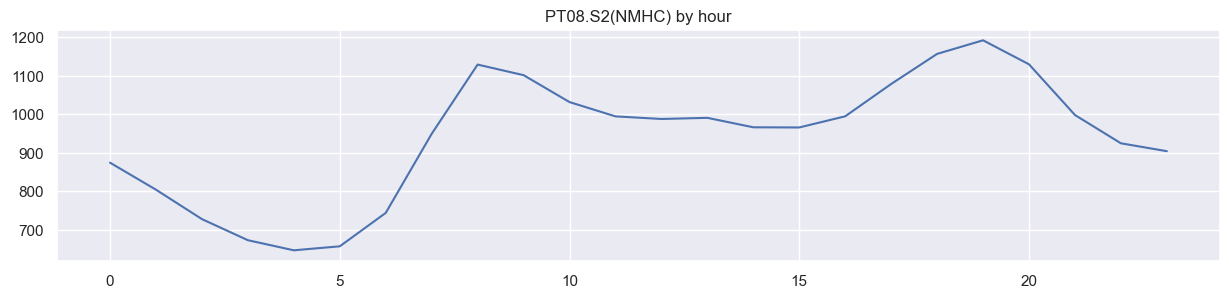

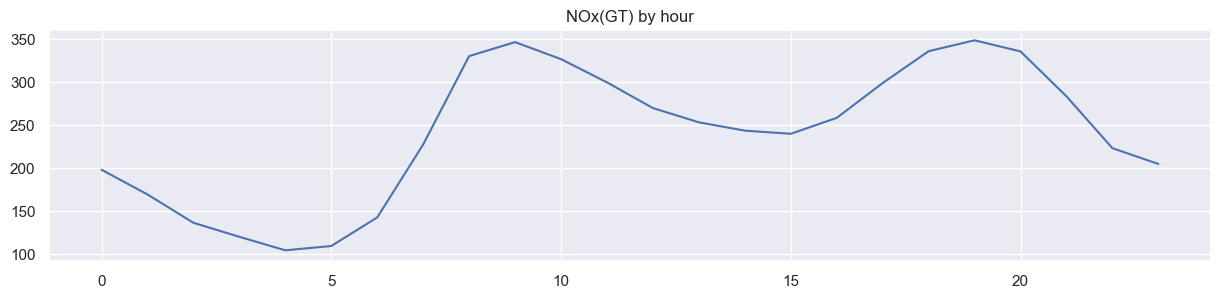

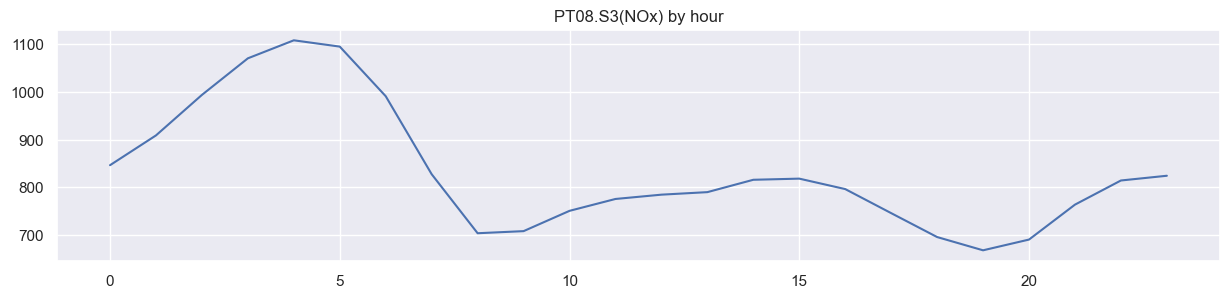

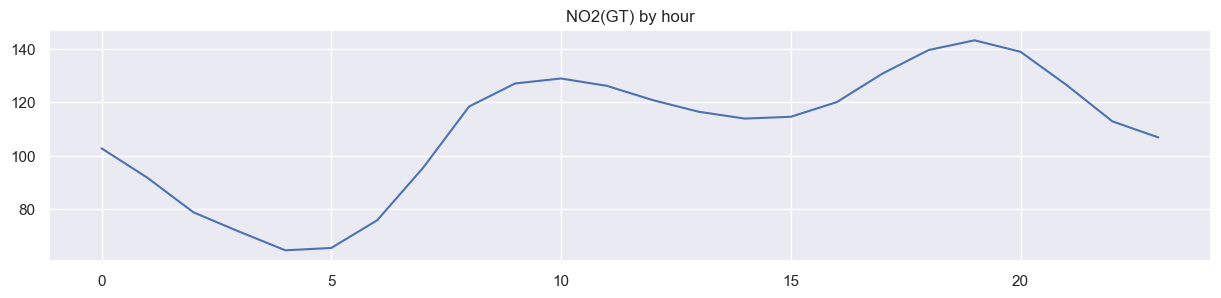

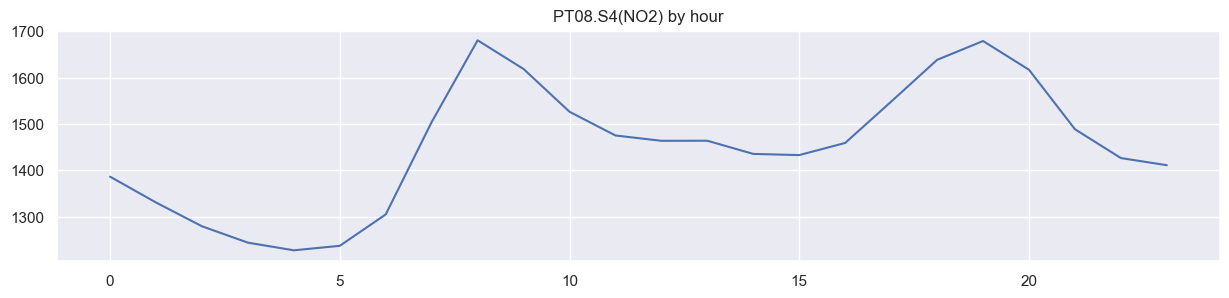

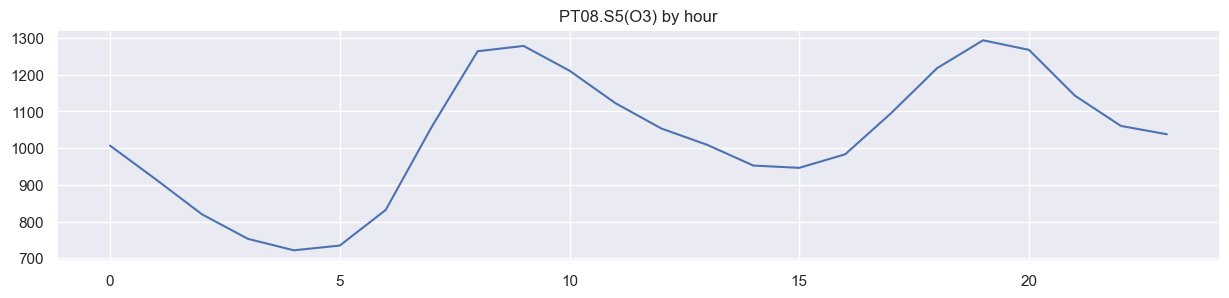

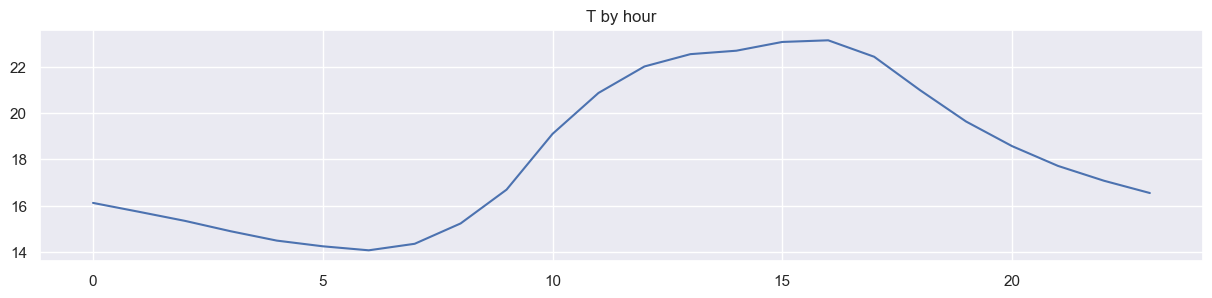

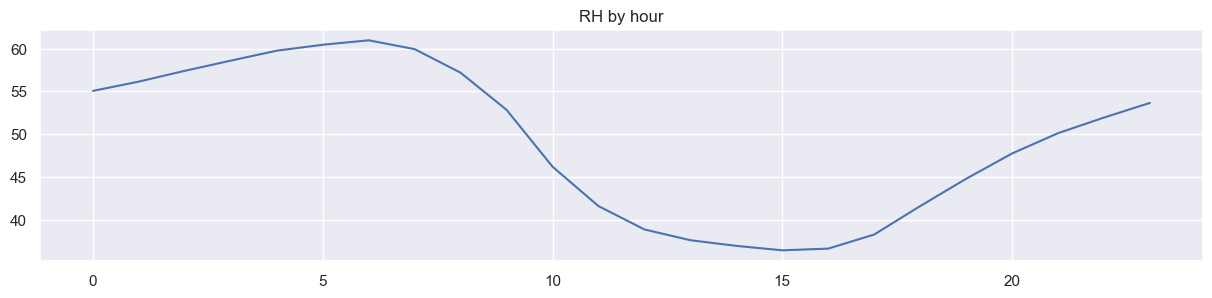

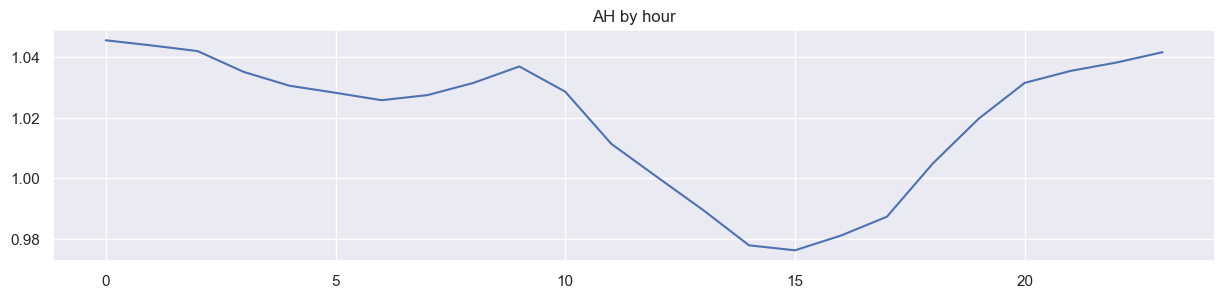

In [93]:
sns.set_theme({'figure.figsize':(15, 3)})

for feature in df:
    if feature != 'Date_Time' and feature != 'Hour' and feature != 'Day' and feature != 'weekday':
        yy = df[feature].groupby(df['Hour']).mean()
        xx = df['Hour'].groupby(df['Hour'])
        plt.plot(yy)
        plt.title(f"{feature} by hour")
        plt.show()

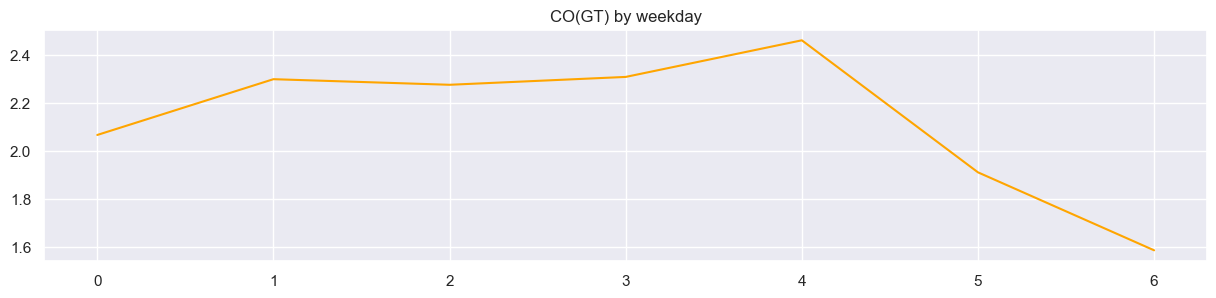

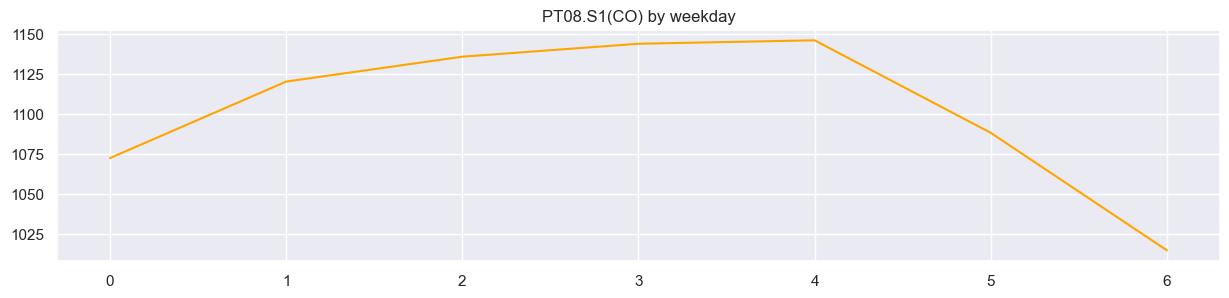

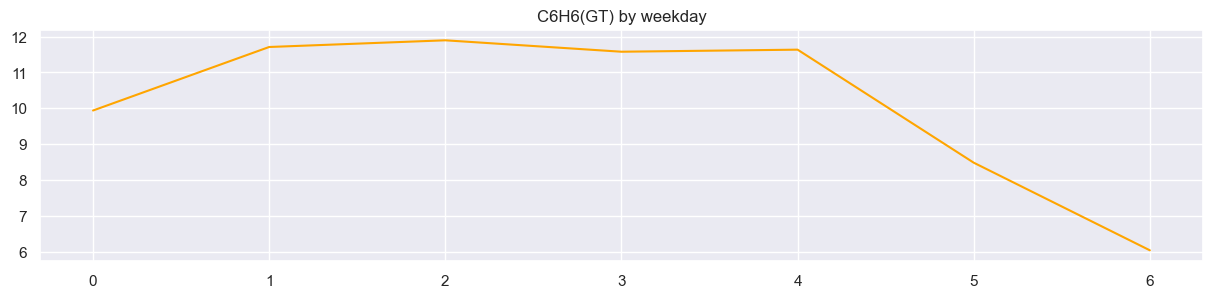

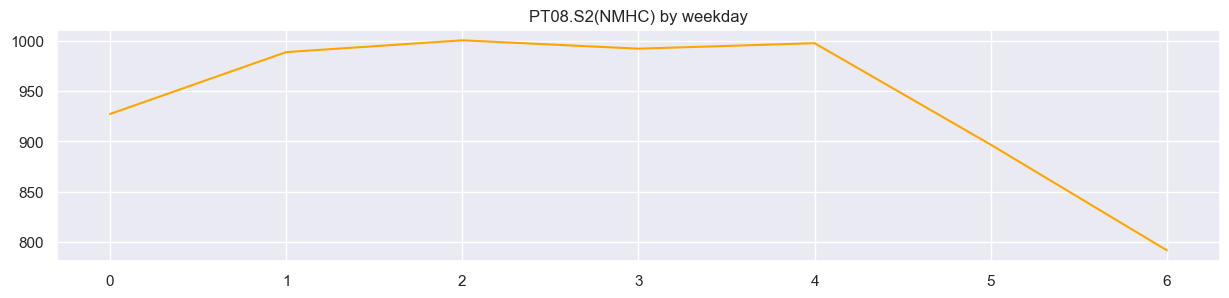

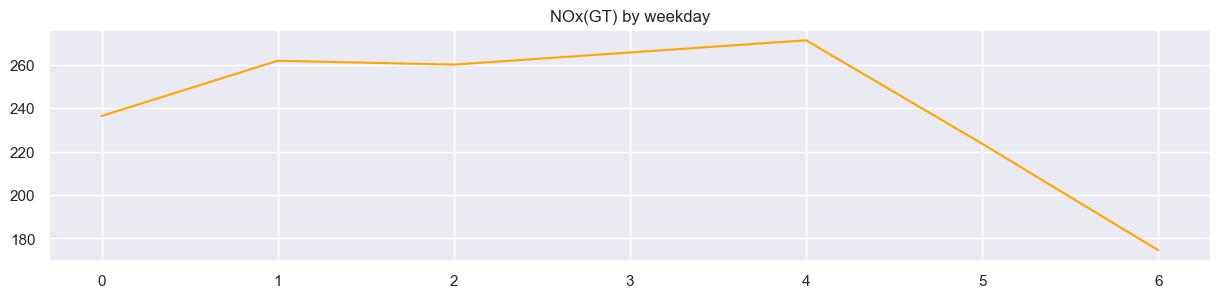

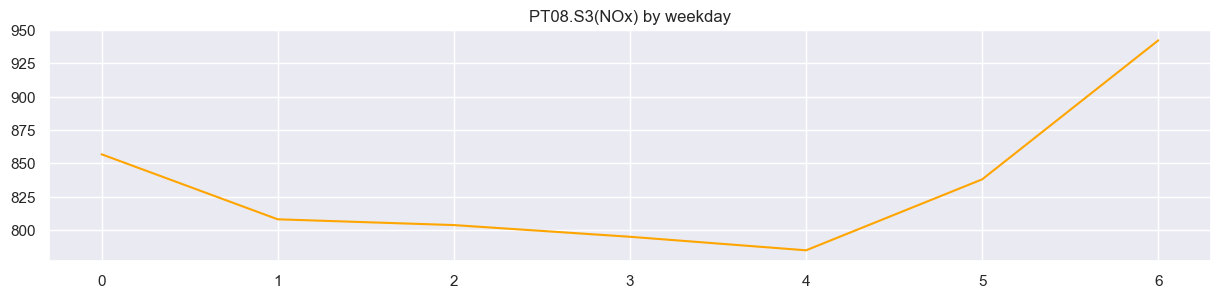

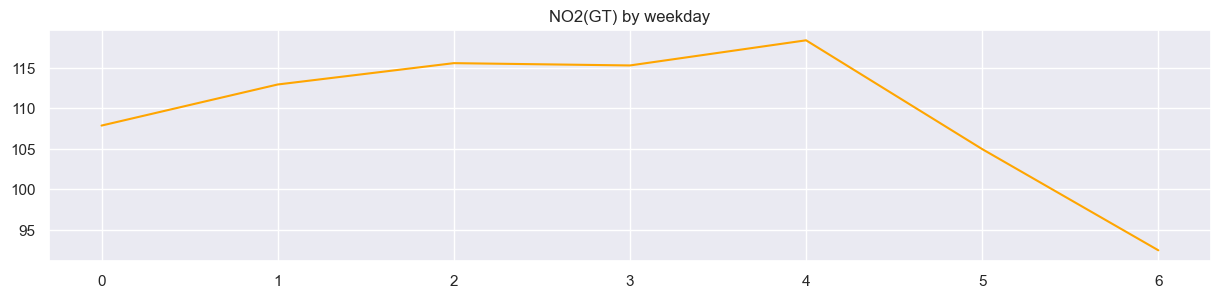

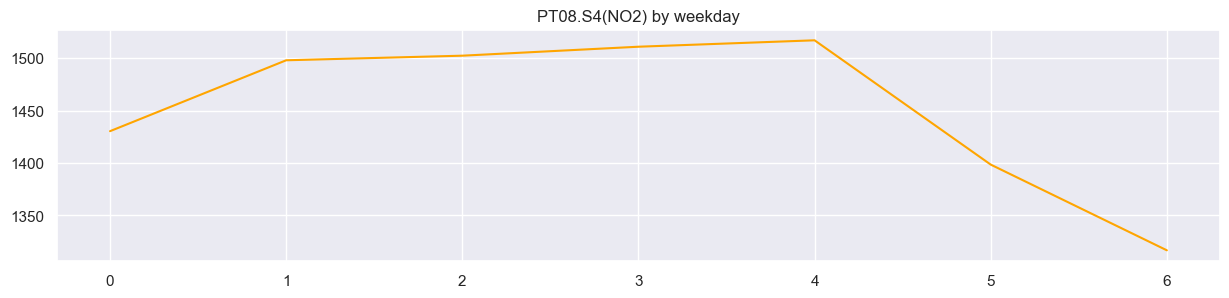

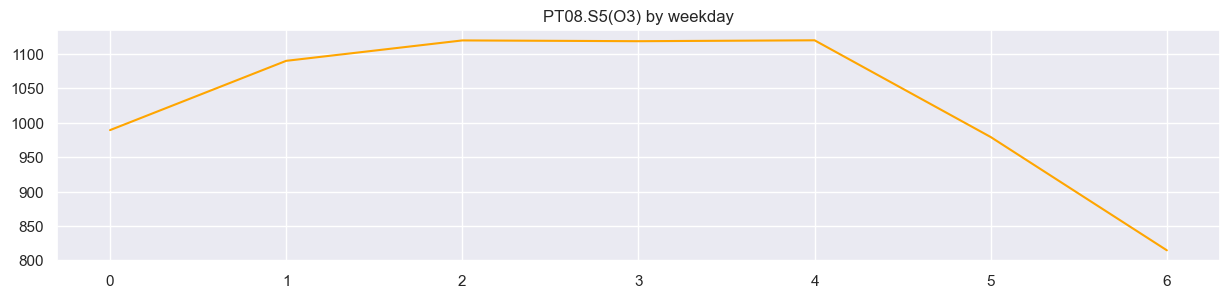

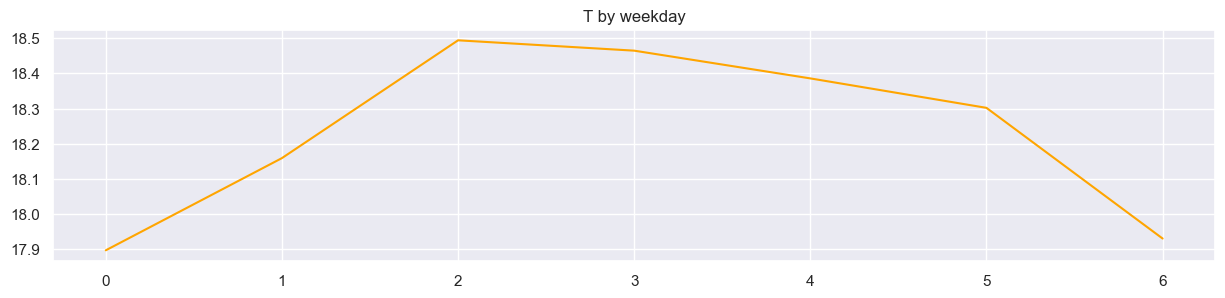

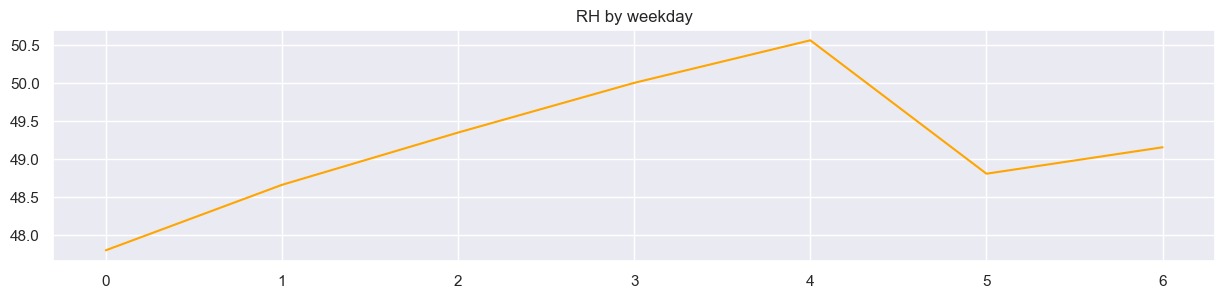

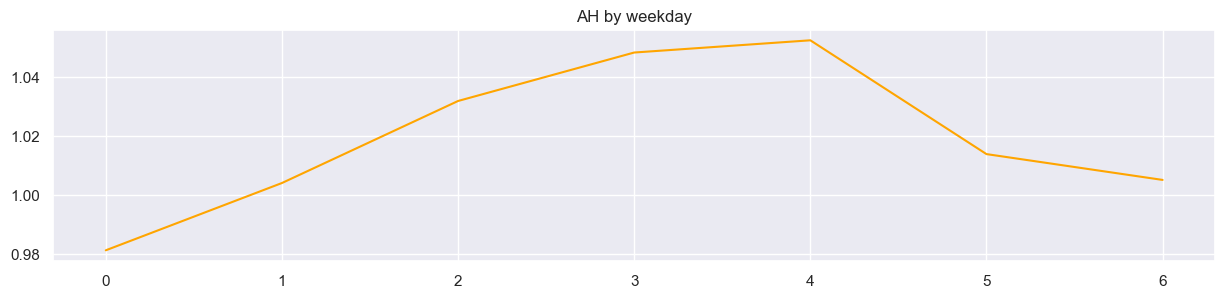

In [96]:
sns.set_theme({'figure.figsize':(15, 3)})

for feature in df:
    if feature != 'Date_Time' and feature != 'Hour' and feature != 'Day' and feature != 'weekday':
        yy = df.groupby('weekday')[feature].mean()
        plt.plot(yy, color='orange')
        plt.title(f"{feature} by weekday")
        plt.show()

In [105]:
columns_to_scale = [col for col in df.columns if col not in ['Date_Time', 'Hour', 'Day', 'weekday']]
print(columns_to_scale)

['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


# Now we standardize the data

In [106]:
# see the mean and sd one time before
df.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.130603  1103.059741    10.179155     942.142620   241.922197   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.100000   938.000000     4.500000     736.000000    96.000000   
50%       1.800000  1067.000000     8.300000     910.012987   180.000000   
75%       2.900000  1239.000000    14.100000    1119.000000   326.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   
std       1.431736   218.196346     7.503812     267.866611   204.315075   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     832.758897   109.632094   1453.298814  1032.544298    18.233408   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      654.000000    76.000000   1227.000000   733.000000    11.700000   
50%      804.000000   104.917526   1460.000000   970.000000    17.600000   
75%      968.000000   136.314685   1668.000000  1293.000000    24.300000   
max     2683.000000   340.000000   2775.000000  2523.000000    44.600000   
std      255.709833    46.462311    343.206131   404.447613     8.781791   

                RH           AH            Date_Time         Hour  \
count  9357.000000  9357.000000                 9357  9357.000000   
mean     49.191386     1.019621  2004-09-21 16:00:00    11.498557   
min       9.200000     0.184700  2004-03-10 18:00:00     0.000000   
25%      35.800000     0.732300  2004-06-16 05:00:00     5.000000   
50%      49.600000     0.989500  2004-09-21 16:00:00    11.000000   
75%      62.300000     1.306700  2004-12-28 03:00:00    18.000000   
max      88.700000     2.231000  2005-04-04 14:00:00    23.000000   
std      17.194506     0.402203                  NaN     6.923182   

               Day      weekday  
count  9357.000000  9357.000000  
mean     15.876884     3.009939  
min       1.000000     0.000000  
25%       8.000000     1.000000  
50%      16.000000     3.000000  
75%      23.000000     5.000000  
max      31.000000     6.000000  
std       8.808653     2.000323

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[columns_to_scale])

In [123]:
scaled_df=pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df.describe()

CO(GT)   PT08.S1(CO)      C6H6(GT)  PT08.S2(NMHC)       NOx(GT)  \
count  9.357000e+03  9.357000e+03  9.357000e+03   9.357000e+03  9.357000e+03   
mean  -2.429985e-17 -2.399610e-16 -6.074962e-17  -8.504947e-17  6.074962e-18   
std    1.000053e+00  1.000053e+00  1.000053e+00   1.000053e+00  1.000053e+00   
min   -1.418356e+00 -2.090246e+00 -1.343276e+00  -2.087504e+00 -1.174338e+00   
25%   -7.198658e-01 -7.565139e-01 -7.568764e-01  -7.696130e-01 -7.142400e-01   
50%   -2.309227e-01 -1.652716e-01 -2.504401e-01  -1.199528e-01 -3.030883e-01   
75%    5.374163e-01  6.230513e-01  5.225418e-01   6.602795e-01  4.115325e-01   
max    6.823827e+00  4.294253e+00  7.132869e+00   4.748353e+00  6.055079e+00   

       PT08.S3(NOx)       NO2(GT)  PT08.S4(NO2)   PT08.S5(O3)             T  \
count  9.357000e+03  9.357000e+03  9.357000e+03  9.357000e+03  9.357000e+03   
mean  -6.682458e-17 -4.859970e-17 -1.214992e-16 -9.112443e-18 -4.859970e-16   
std    1.000053e+00  1.000053e+00  1.000053e+00  1.000053e+00  1.000053e+00   
min   -1.997523e+00 -2.316670e+00 -2.629169e+00 -2.006657e+00 -2.292754e+00   
25%   -6.991067e-01 -7.238962e-01 -6.594023e-01 -7.406653e-01 -7.440119e-01   
50%   -1.124729e-01 -1.014762e-01  1.952630e-02 -1.546495e-01 -7.213130e-02   
75%    5.289133e-01  5.743153e-01  6.256085e-01  6.440132e-01  6.908518e-01   
max    7.236092e+00  4.958432e+00  3.851248e+00  3.685361e+00  3.002577e+00   

                 RH            AH  
count  9.357000e+03  9.357000e+03  
mean  -1.063118e-16  4.859970e-17  
std    1.000053e+00  1.000053e+00  
min   -2.325948e+00 -2.075981e+00  
25%   -7.788594e-01 -7.144059e-01  
50%    2.376548e-02 -7.489351e-02  
75%    7.624130e-01  7.138053e-01  
max    2.297869e+00  3.012022e+00

### Must join back the 4 cols back with these

In [121]:
time_columns = df[['Date_Time', 'Hour', 'Day', 'weekday']]

final_df = pd.concat([scaled_df, time_columns], axis=1)

In [122]:
final_df.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0  0.327869     1.177627  0.229342       0.387741 -0.371614      0.873072   
1 -0.091225     0.865965 -0.103840       0.048002 -0.679977      1.334557   
2  0.048473     1.370125 -0.157149      -0.011733 -0.542927      1.201587   
3  0.048473     1.250960 -0.130495       0.021868 -0.342246      1.013864   
4 -0.370621     0.774299 -0.490331      -0.396273 -0.542927      1.455795   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  \
0  0.072491      0.695541     0.582197 -0.527644 -0.016947 -0.651002   
1 -0.379513      0.307998    -0.149704 -0.561807 -0.086741 -0.731314   
2  0.094015      0.296343     0.102505 -0.721236  0.279675 -0.669899   
3  0.266206      0.380845     0.421476 -0.823727  0.628642 -0.579144   
4  0.137063      0.106942     0.191520 -0.800951  0.605378 -0.573922   

            Date_Time  Hour  Day  weekday  
0 2004-03-10 18:00:00    18   10        2  
1 2004-03-10 19:00:00    19   10        2  
2 2004-03-10 20:00:00    20   10        2  
3 2004-03-10 21:00:00    21   10        2  
4 2004-03-10 22:00:00    22   10        2

# Plotting again to make sure everything has worked fine

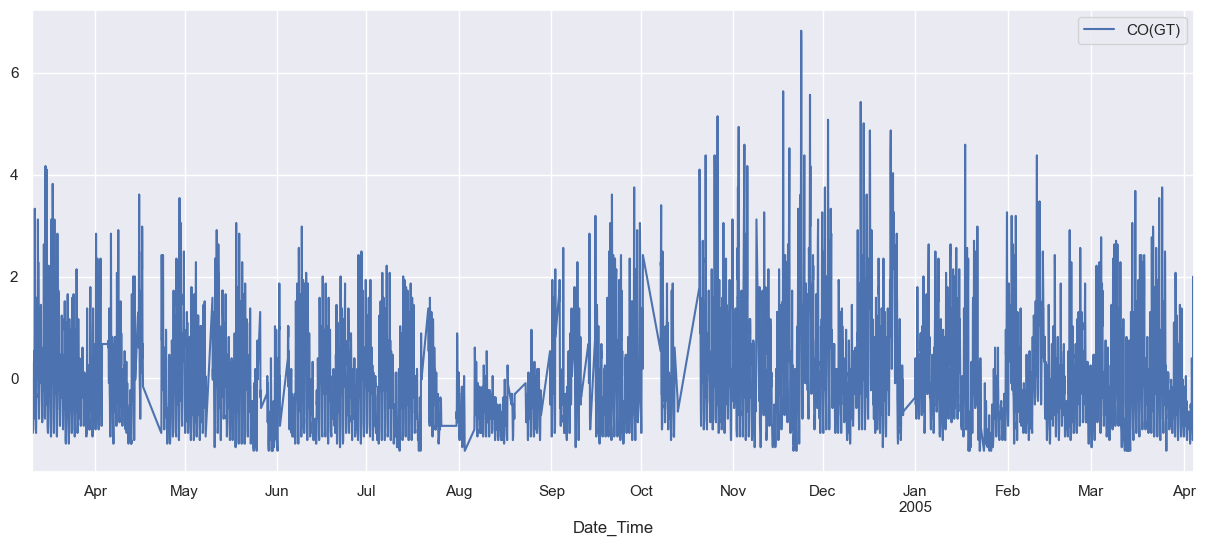

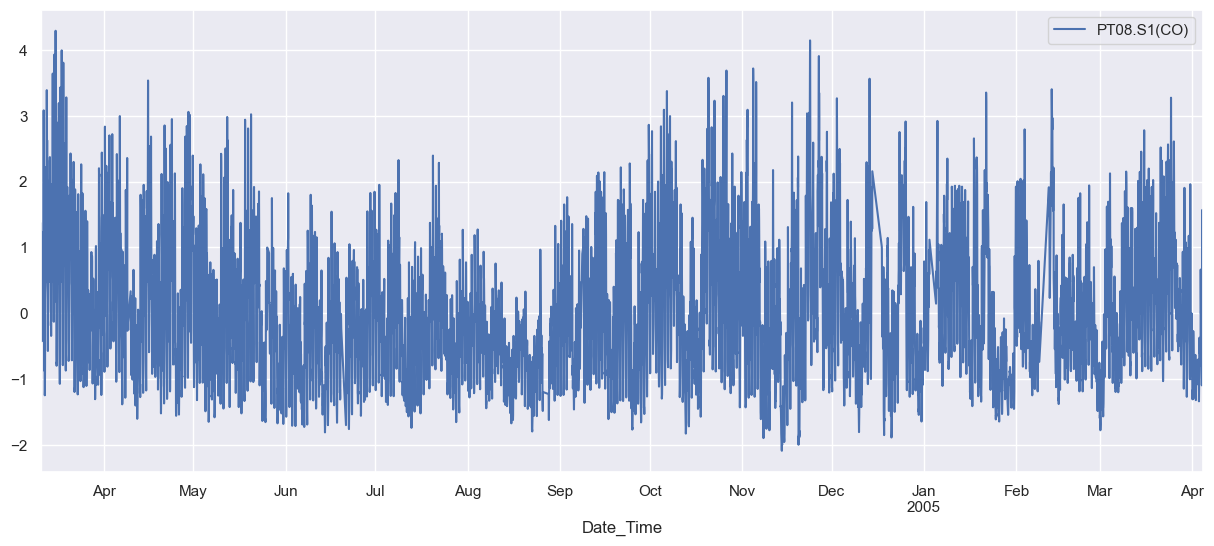

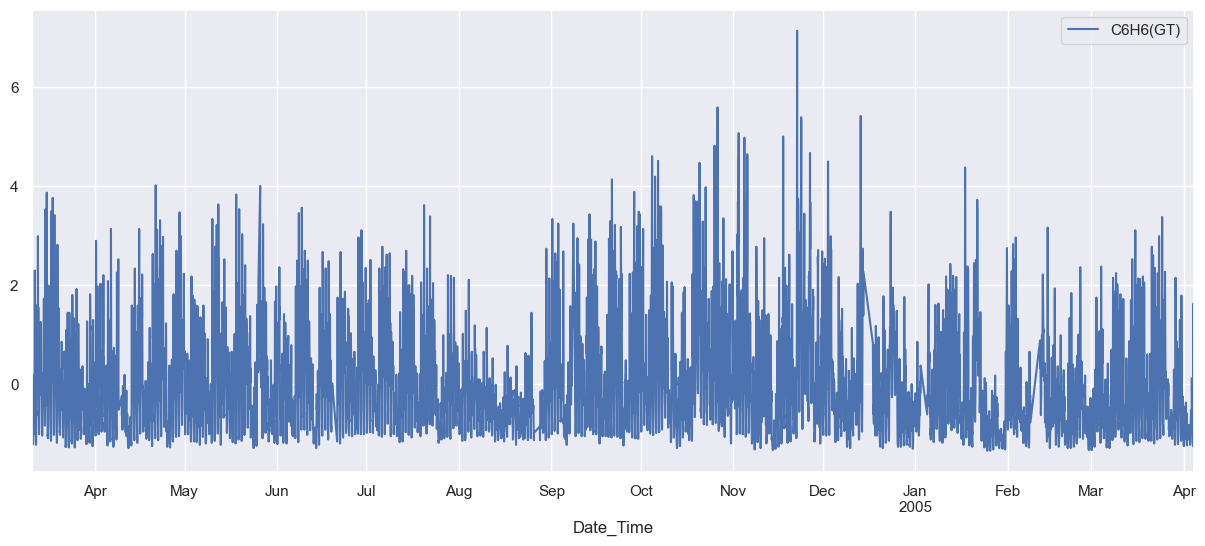

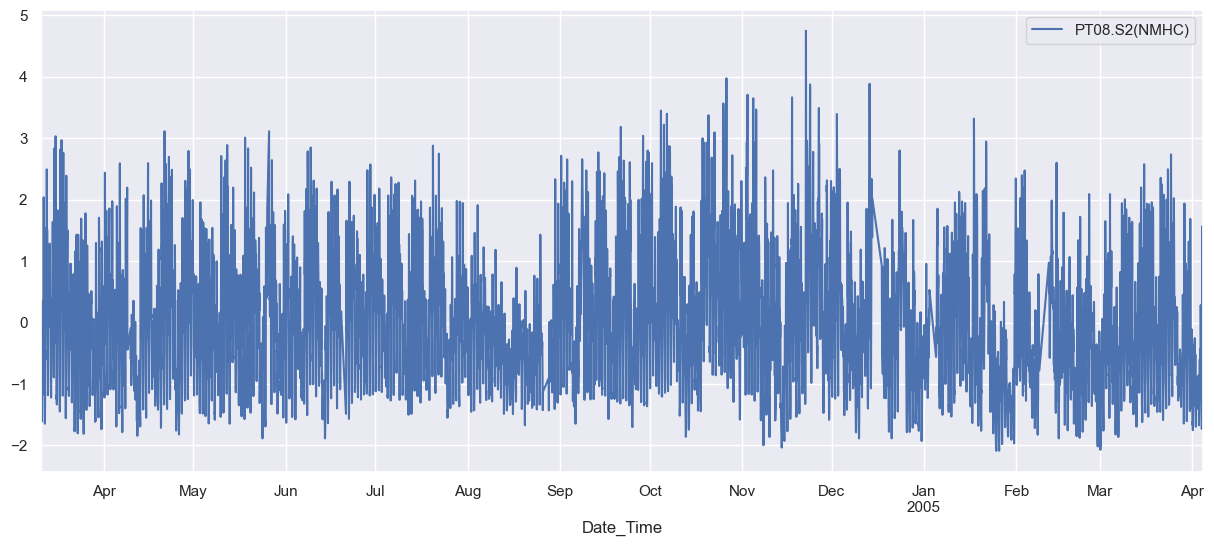

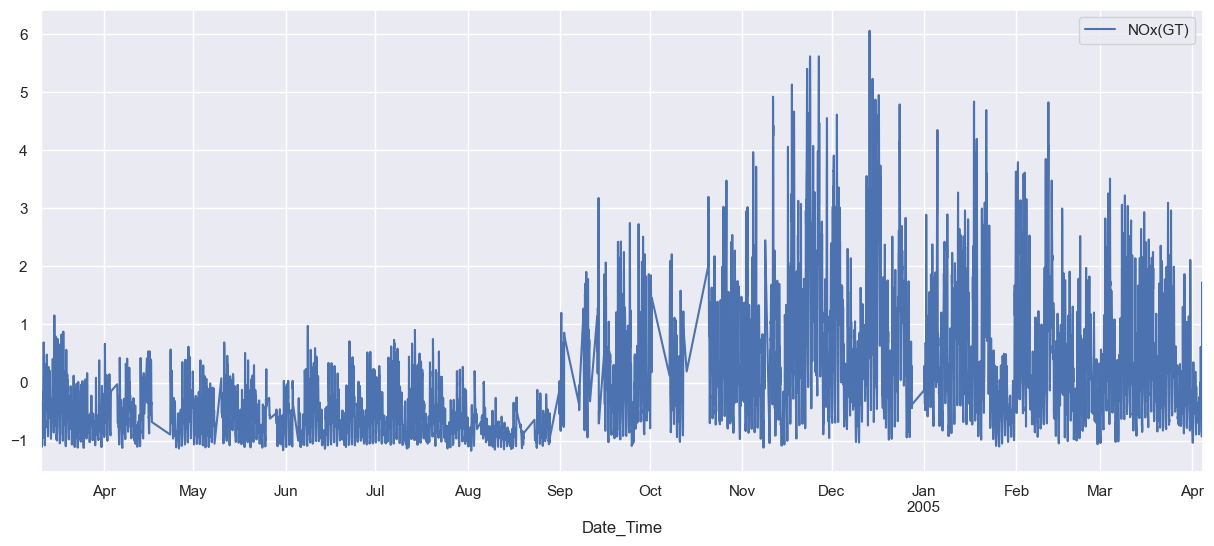

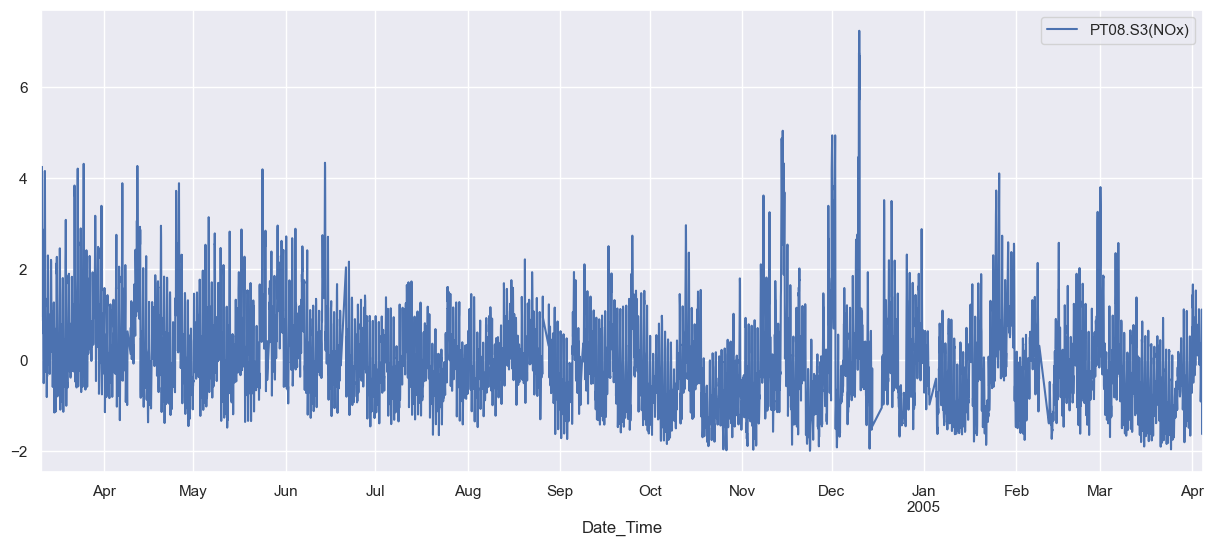

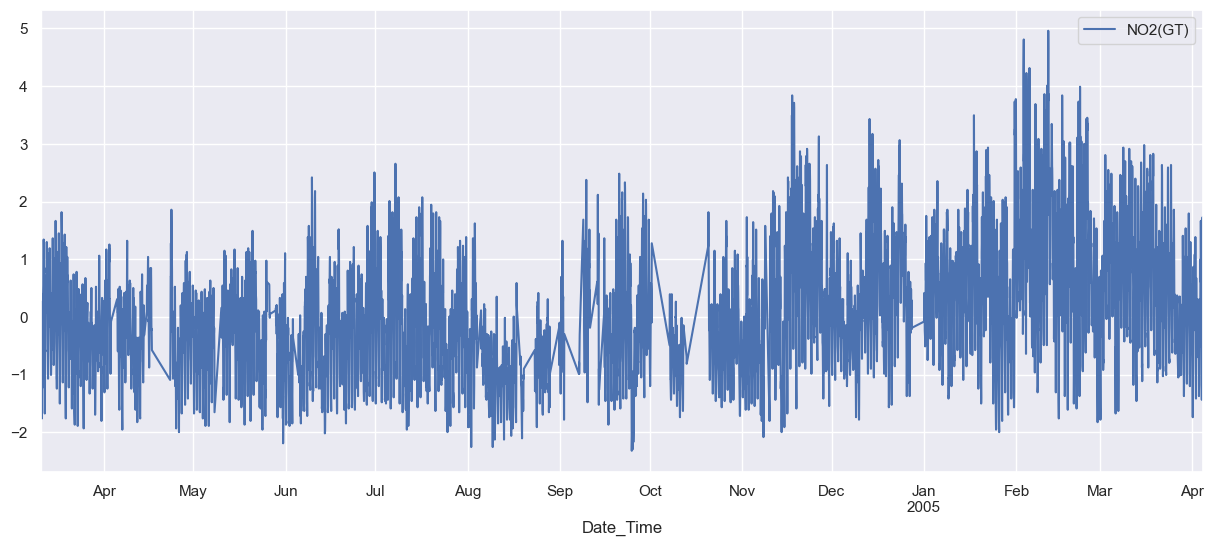

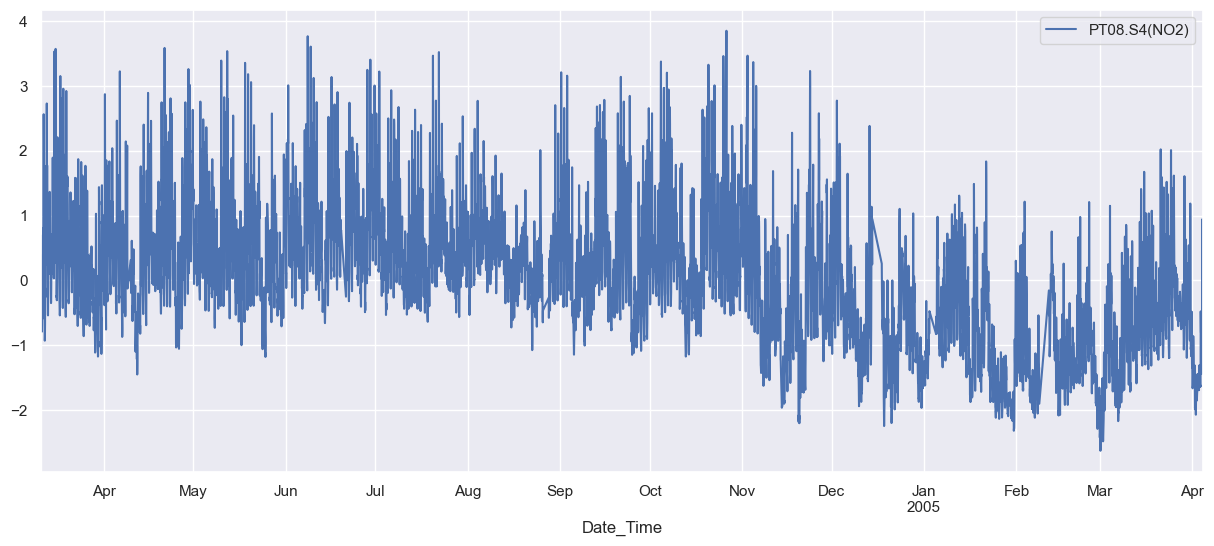

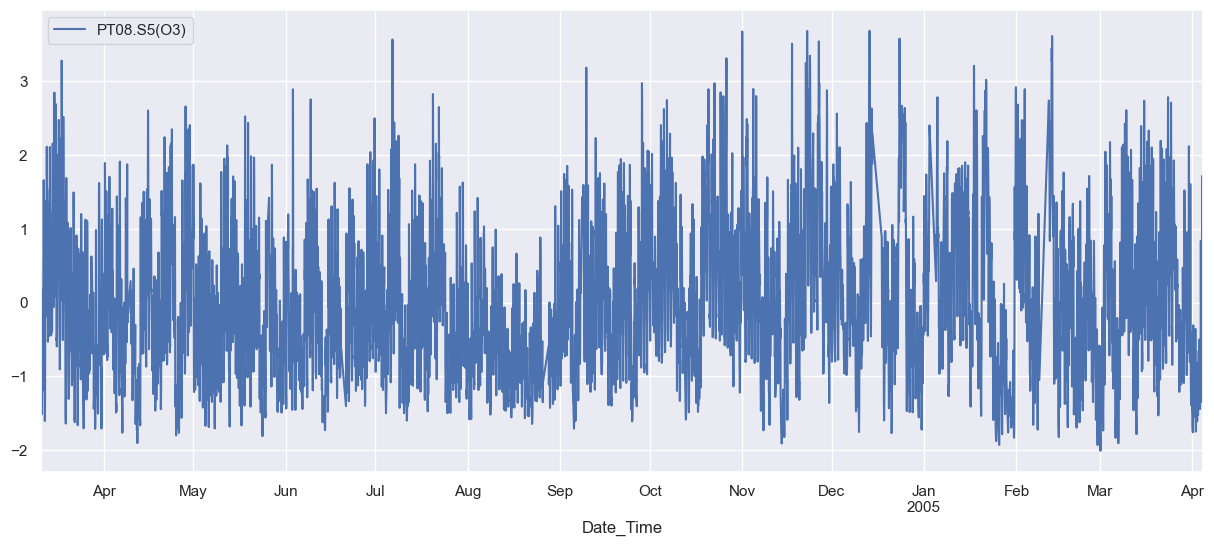

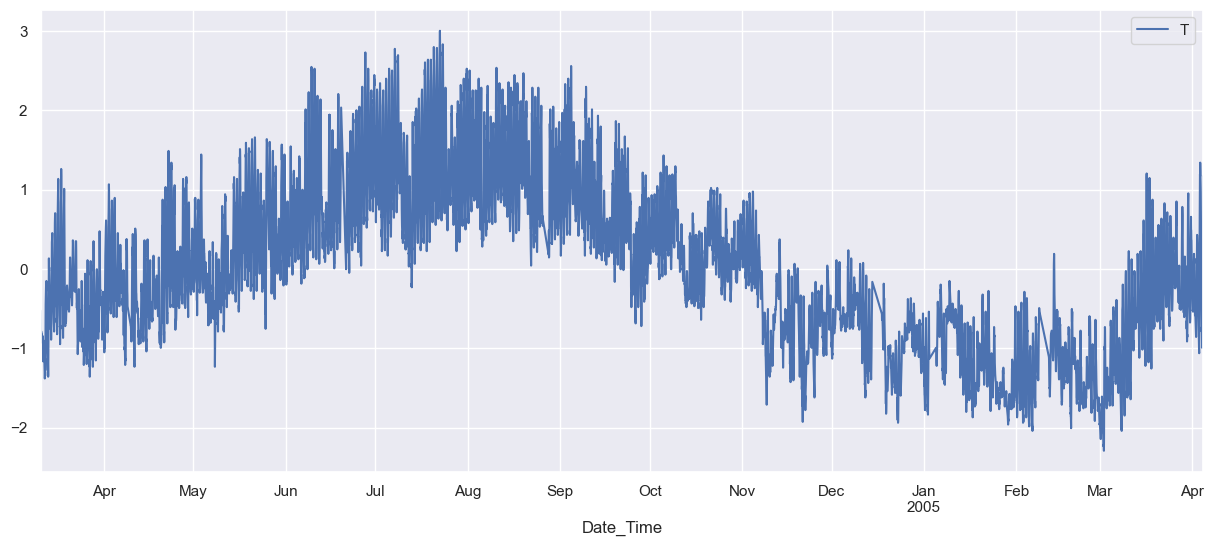

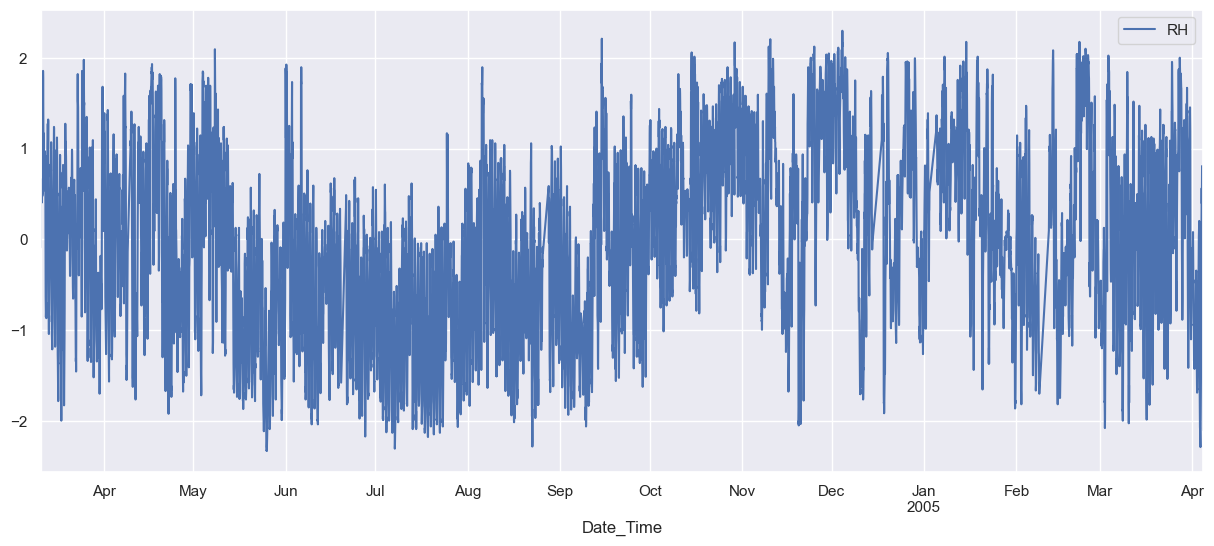

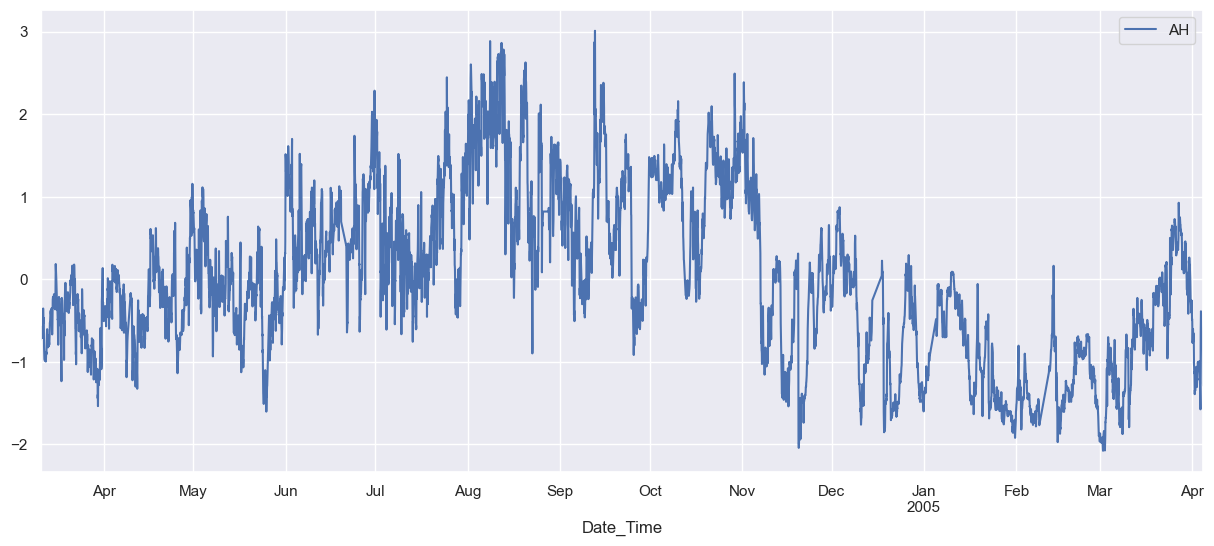

In [129]:
sns.set_theme({'figure.figsize':(15, 6)})

for feature in final_df:
    if feature != 'Date_Time' and feature != 'Hour' and feature != 'Day' and feature != 'weekday':
        final_df.plot(x='Date_Time', y=feature)
        plt.show()

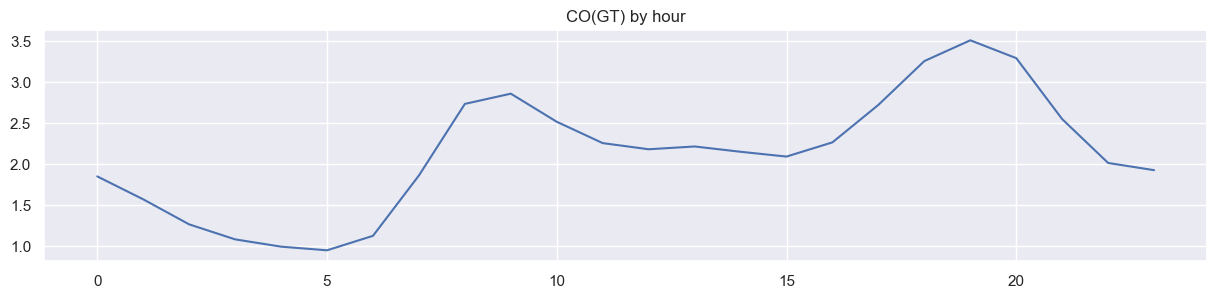

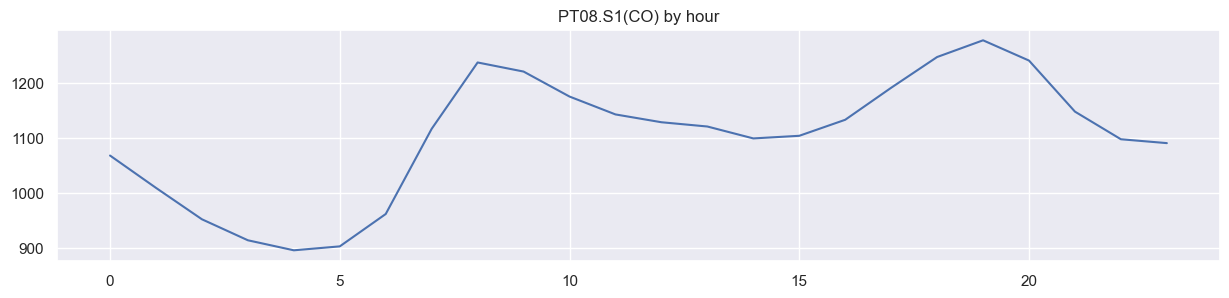

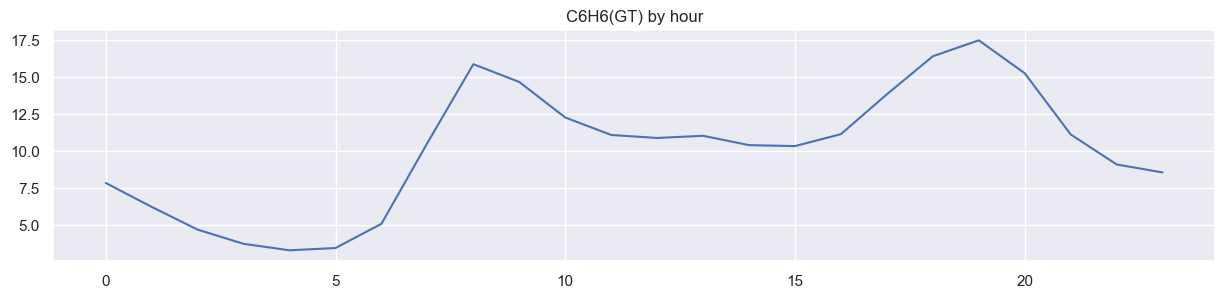

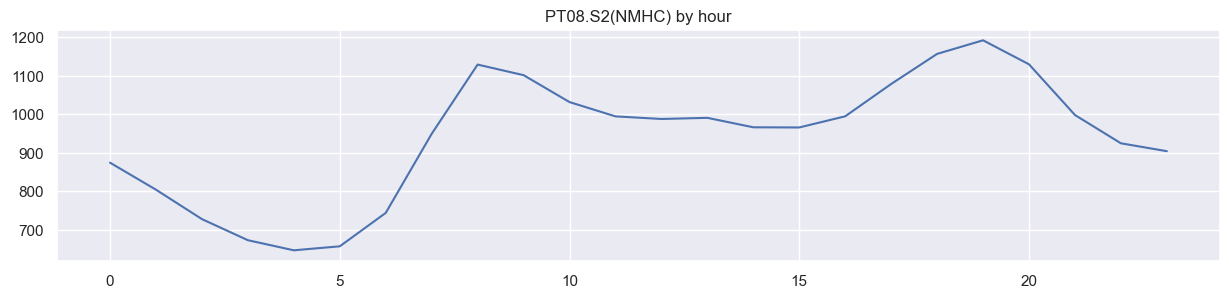

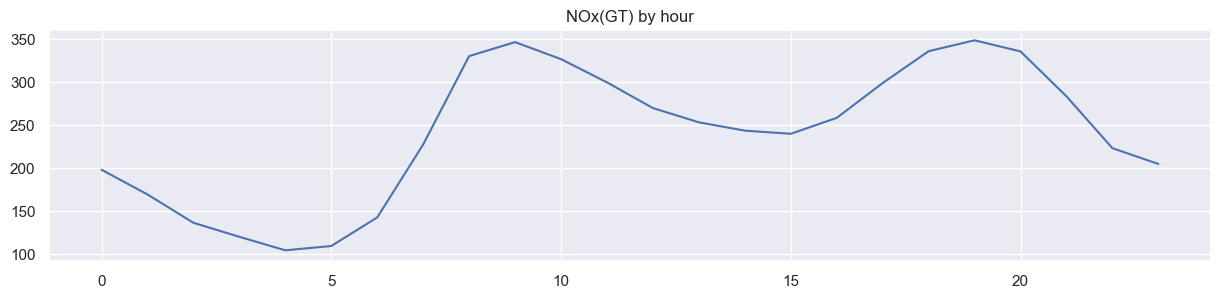

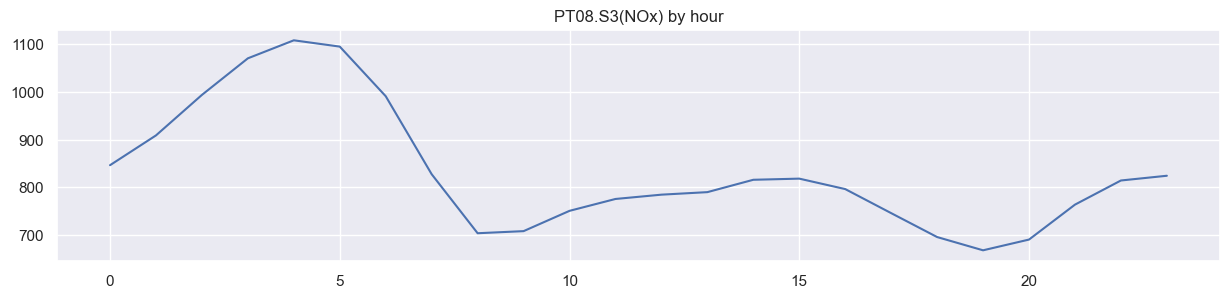

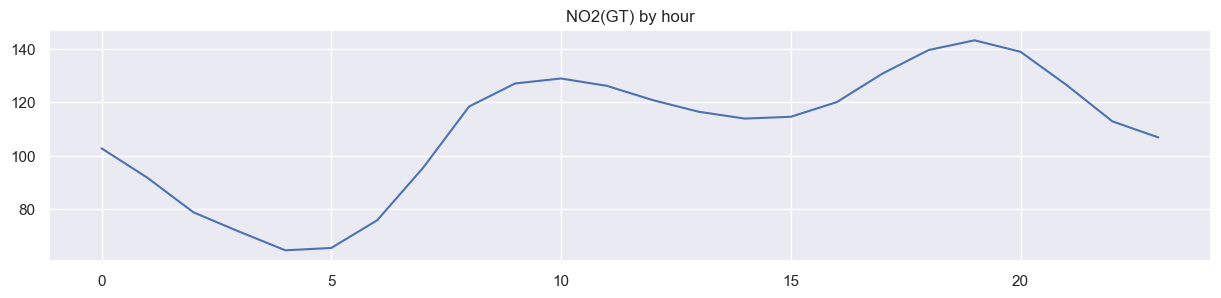

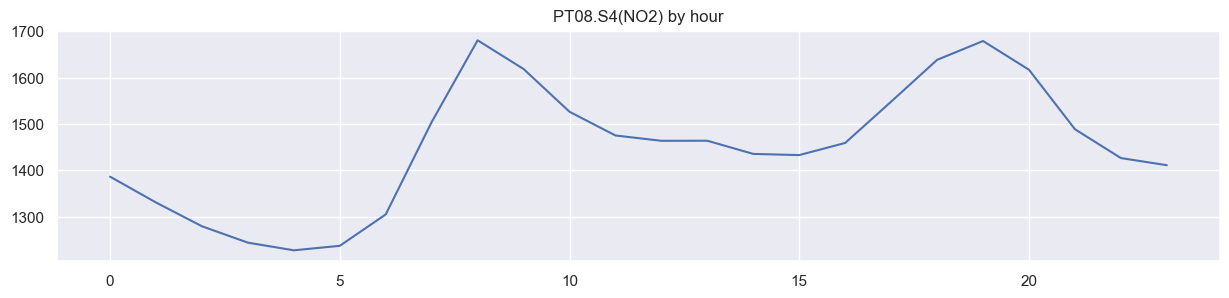

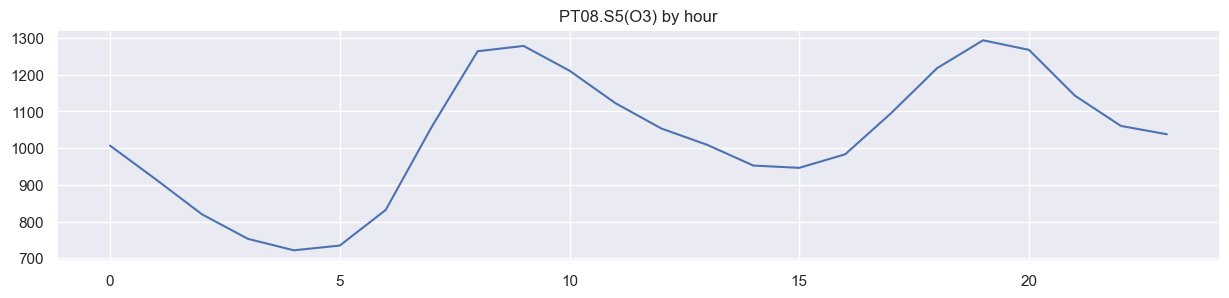

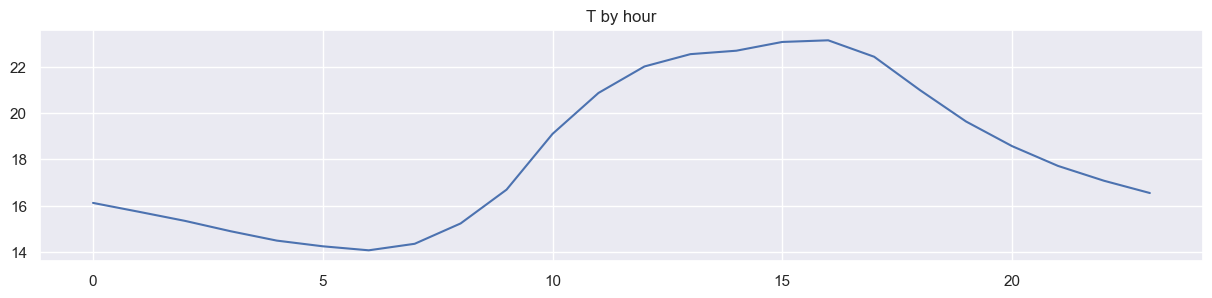

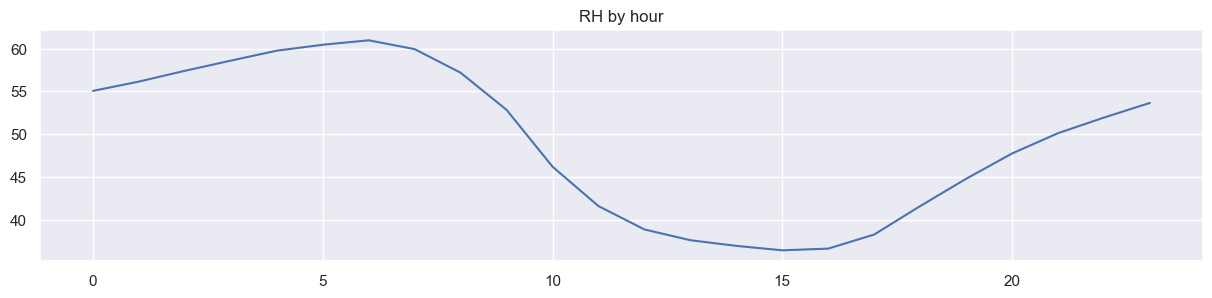

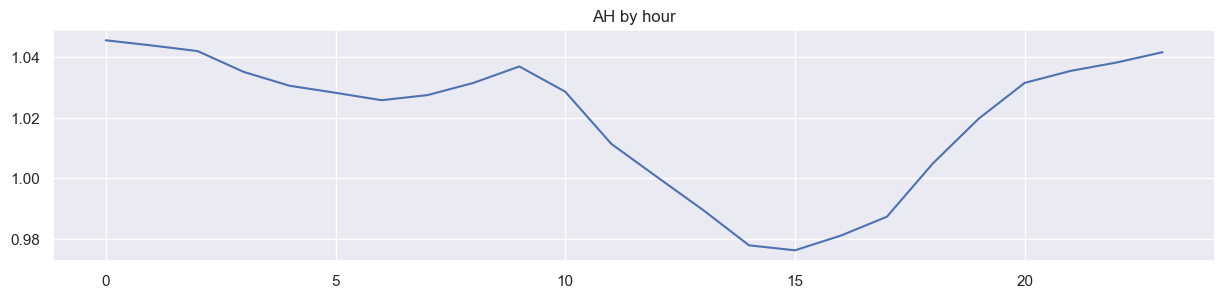

In [125]:
sns.set_theme({'figure.figsize':(15, 3)})

for feature in final_df:
    if feature != 'Date_Time' and feature != 'Hour' and feature != 'Day' and feature != 'weekday':
        yy = final_df[feature].groupby(df['Hour']).mean()
        plt.plot(yy)
        plt.title(f"{feature} by hour")
        plt.show()

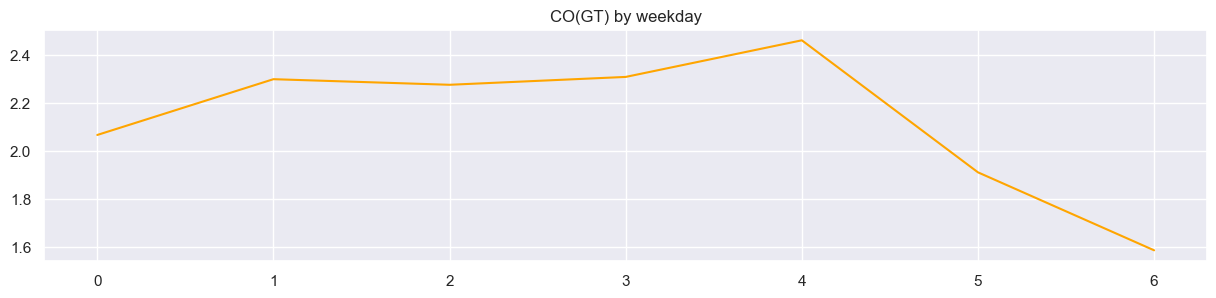

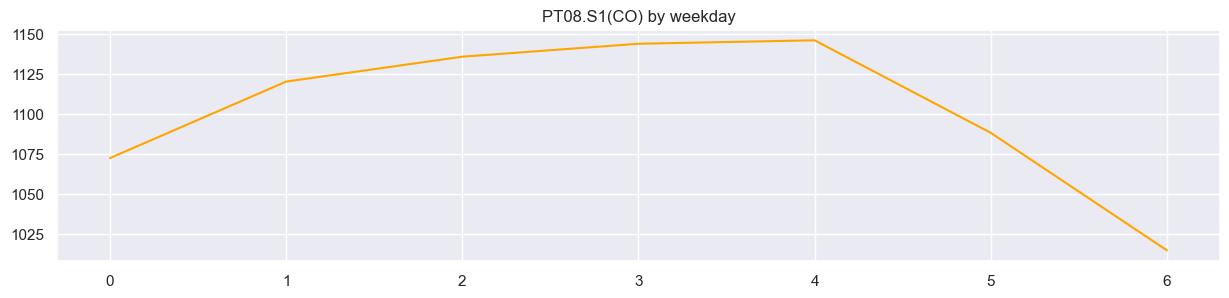

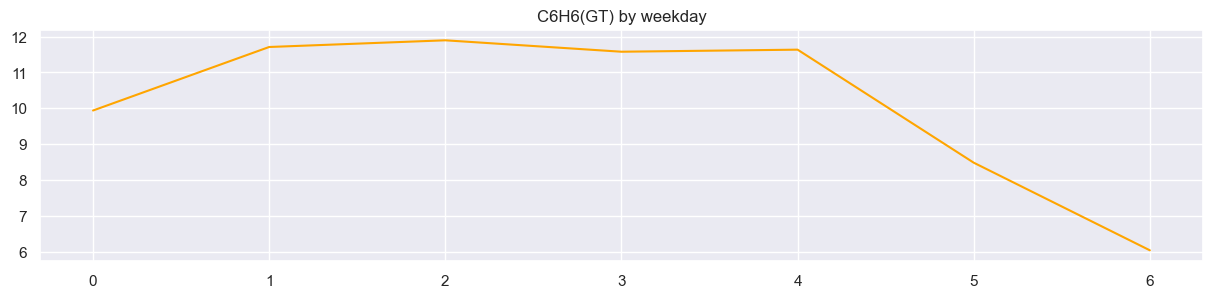

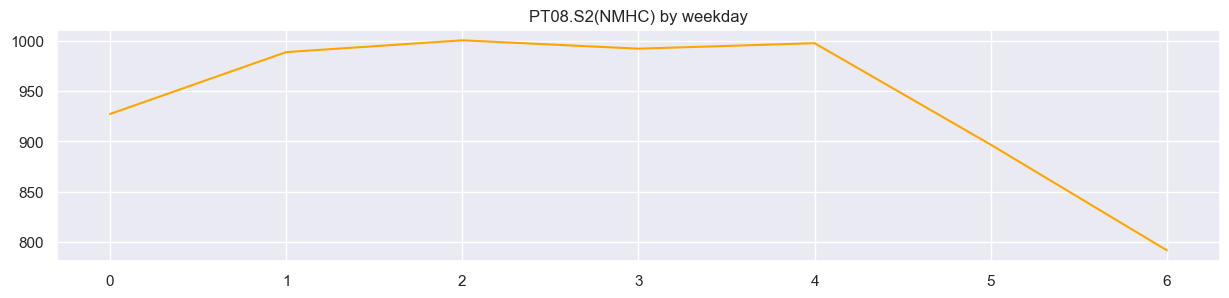

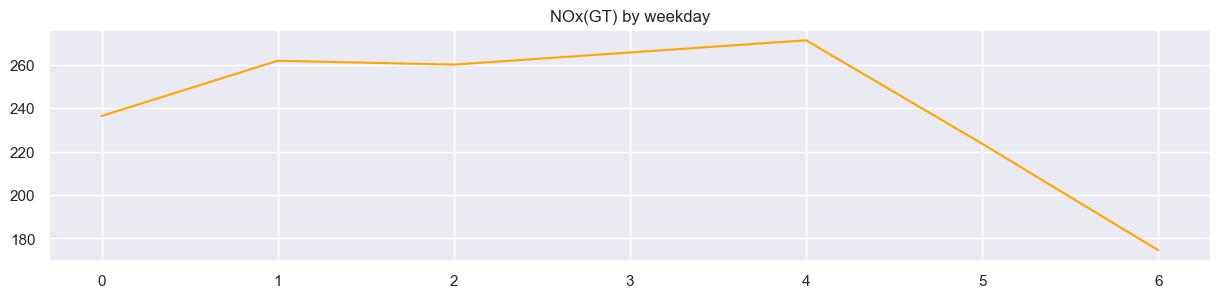

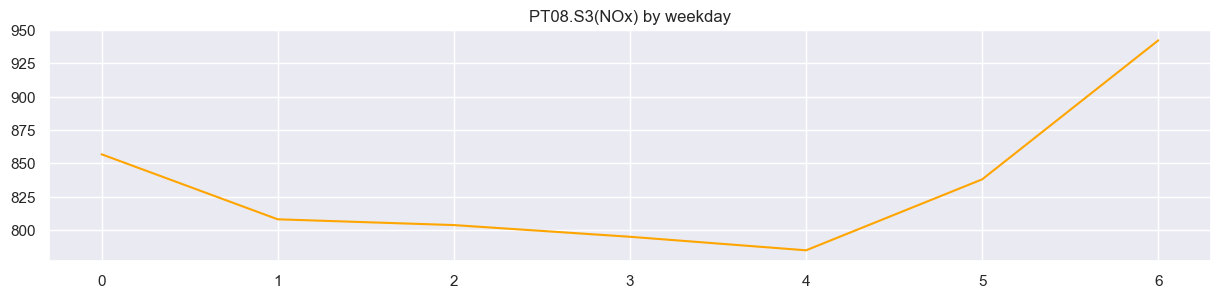

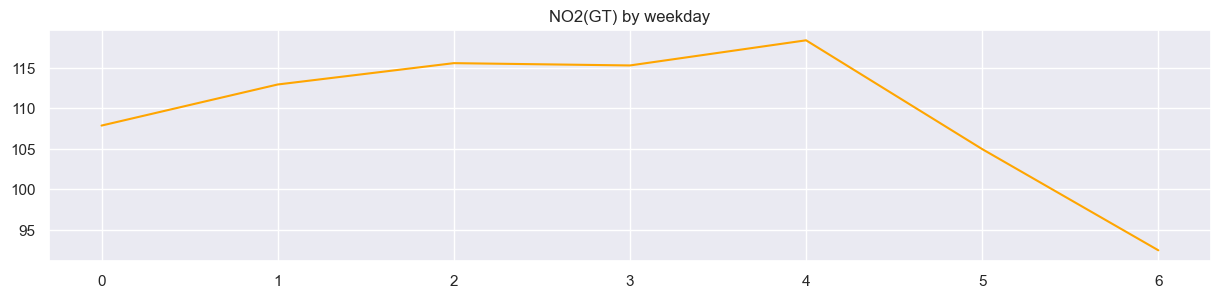

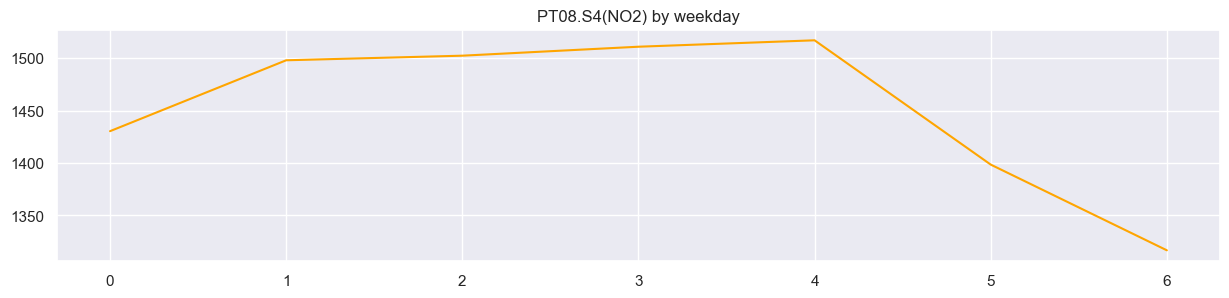

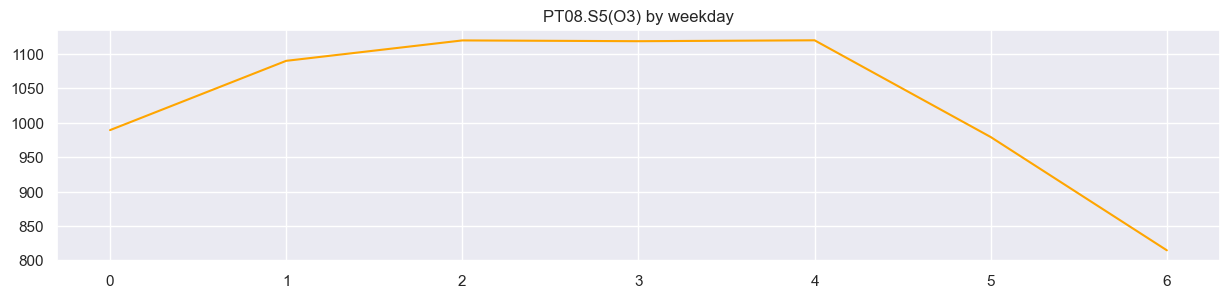

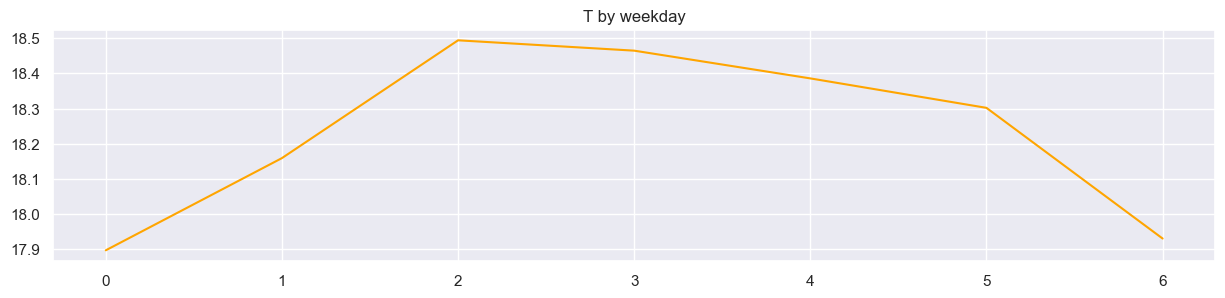

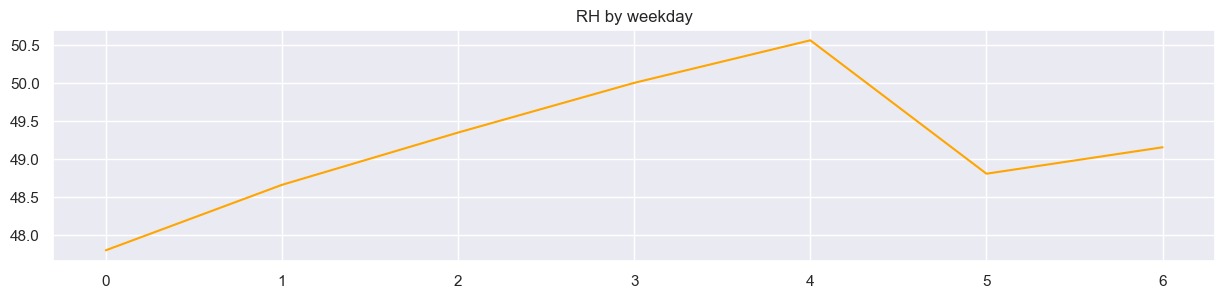

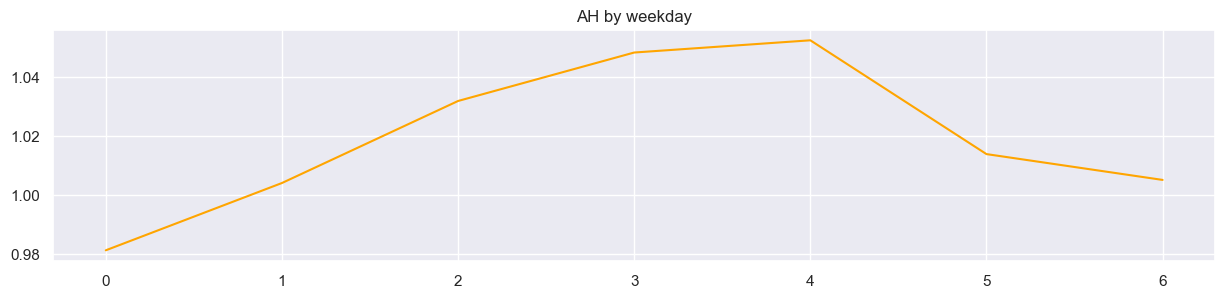

In [127]:
sns.set_theme({'figure.figsize':(15, 3)})

for feature in final_df:
    if feature != 'Date_Time' and feature != 'Hour' and feature != 'Day' and feature != 'weekday':
        yy = final_df.groupby('weekday')[feature].mean()
        plt.plot(yy, color='orange')
        plt.title(f"{feature} by weekday")
        plt.show()

# We now export this dataset into a new csv file

In [130]:
final_df.to_csv('Data/processed_AirQualityUCI.csv', index=False)

In [142]:
tempdf = df
tempdf.to_csv('Data/unscaled_processed_airdata.csv', index=False)

In [141]:
df.head(10)

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   
5     1.2       1197.0       4.7          750.0     89.0        1337.0   
6     1.2       1185.0       3.6          690.0     62.0        1462.0   
7     1.0       1136.0       3.3          672.0     62.0        1453.0   
8     0.9       1094.0       2.3          609.0     45.0        1579.0   
9     0.6       1010.0       1.7          561.0     33.0        1705.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH           Date_Time  \
0    113.0        1692.0       1268.0  13.6  48.9  0.7578 2004-03-10 18:00:00   
1     92.0        1559.0        972.0  13.3  47.7  0.7255 2004-03-10 19:00:00   
2    114.0        1555.0       1074.0  11.9  54.0  0.7502 2004-03-10 20:00:00   
3    122.0        1584.0       1203.0  11.0  60.0  0.7867 2004-03-10 21:00:00   
4    116.0        1490.0       1110.0  11.2  59.6  0.7888 2004-03-10 22:00:00   
5     96.0        1393.0        949.0  11.2  59.2  0.7848 2004-03-10 23:00:00   
6     77.0        1333.0        733.0  11.3  56.8  0.7603 2004-03-11 00:00:00   
7     76.0        1333.0        730.0  10.7  60.0  0.7702 2004-03-11 01:00:00   
8     60.0        1276.0        620.0  10.7  59.7  0.7648 2004-03-11 02:00:00   
9     47.0        1235.0        501.0  10.3  60.2  0.7517 2004-03-11 03:00:00   

   Hour  Day  weekday  
0    18   10        2  
1    19   10        2  
2    20   10        2  
3    21   10        2  
4    22   10        2  
5    23   10        2  
6     0   11        3  
7     1   11        3  
8     2   11        3  
9     3   11        3